# Los datos: partidos y jugadores de todos los mundiales hasta Brasil 2014

Se tienen dos archivos .csv: *WorldCupMatches.csv* y *WorldCupPlayers.csv* (https://drive.google.com/drive/folders/14qGoWAdkwQRS2m55dszWzF3f0eviAS1k?usp=sharing)

El primero de los dos archivos (*WorldCupMatches.csv*) contiene información sobre partidos individuales de cada mundial desde 1930 hasta 2014, con los siguientes campos (en el mismo orden que en el archivo):


*   Año del mundial
*   Fecha y hora del partido
*   Etapa (e.g. grupos, semis, final, etc)
*   Nombre del estadio
*   Ciudad del estadio
*   Fecha y hora del partido
*   Etapa (e.g. grupos, semis, final, etc)
*   Nombre del estadio
*   Ciudad del estadio
*   Equipo local
*   Goles del equipo local
*   Equipo visitante
*   Goles del equipo visitante
*   Cantidad de expectadores en el público
*   Condición de la victoria (e.g. si fue por penales)
*   Goles anotados hasta el primer tiempo por el local
*   Goles anotados hasta el primer tiempo por el visitante
*   Nombre y país del árbitro y los asistentes
*   Un ID único por ronda de mundial y por partido
*   Código de los dos equipos que jugaron el partido

El otro archivo (*WorldCupPlayers.csv*) contiene los jugadores de todos los partidos de todos los mundiales, con los siguientes campos:

*   ID único por ronda de mundial y por partido
*   Iniciales del equipo 
*   Nombre del director técnico
*   Titularidad (S) o suplente (N)
*   Número de camiseta
*   Nombre del jugador
*   Si es arquero (GK) o capitán (C)
*   Eventos asociados al jugador. Solo nos interesan los de la forma *GX'*, que significa que el jugador metió un gol en el minuto X. Hay un evento por gol que haya hecho el jugador en ese partido.

# Preguntas a responder:

1. Construir un ranking de los mundiales por cantidad de goles anotados en promedio por partido (por ejemplo, en una lista).

2. Hacer un gráfico de barras donde en el eje Y figura la cantidad promedio de goles y en el X aparecen los mundiales, ordenados de izquierda a derecha en cantidad decreciente de goles:

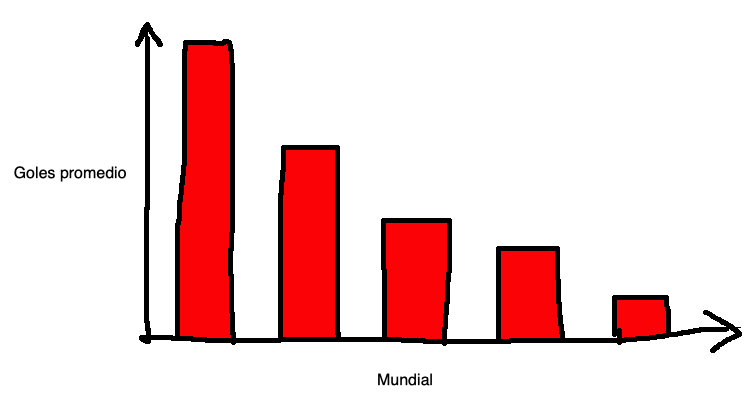


3. Construir un ranking de los países que más partidos ganaron por penales. Representarlo en un gráfico igual que en la consigna anterior.

4. ¿Quién fue el arquero que más partidos ganó por penales?

5. Construir un histograma que muestra como están distribuidos los goles a lo largo de la duración de un partido. Es decir, armar un gráfico que divida los '90 minutos de un partido en bines de 4 minutos en el eje X, y que tenga en el eje Y la cantidad total de goles anotados en el bin correspondiente. 

6. Hacerlo por separado para la fase de grupos y para la fase de eliminación (todos los partidos posteriores a la fase de grupos).

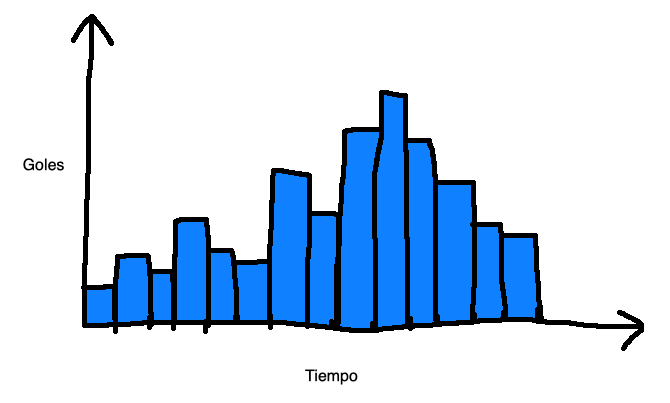

7. Para los partidos en los que hubo al menos algún gol, obtener el tiempo que transcurrió hasta el primer gol. h
Hacer un histograma de la distribución de estos valores.

8. Para los partidos en los que hubo más de un gol, obtener los tiempos transcurridos entre goles. Hacer un histograma de la distribución de estos valores.

9. ¿Se parecen estas distribuciones a algunas de las que comunes?


PS: Las ilustraciones con Paint son deliberadas (si un ejemplo no se puede ilustrar fácil con Paint, no se puede ilustrar fácil) - Enzo Tagliazzuchi




## 1. y 2.
Construir un ranking de los mundiales por cantidad de goles anotados en promedio por partido (por ejemplo, en una lista).

In [1]:
import pandas as pd # La usamos para manejar la base de datos (y también graficar) https://pandas.pydata.org/docs/

import matplotlib.pylab as plt # Herramienta principal de visualización https://matplotlib.org/stable/contents.html

import seaborn as sbn # Herramienta complementaria de visualización https://seaborn.pydata.org/

import numpy as np # Siempre resulta que la usamos

In [2]:
partidos = 'WorldCupMatches.csv' # Definimos la ubicación + nombre de archivo en cuestión

matches = pd.read_csv(partidos) # Levantamos el archivo a través de pandas. Ahora, matches es un Data Frame
matches.dropna(axis=1, how='all', inplace=True) # Elimino filas con todos los valores nan
matches.drop_duplicates(inplace=True)
matches.head

<bound method NDFrame.head of        Year              Datetime        Stage             Stadium  \
0    1930.0  13 Jul 1930 - 15:00       Group 1             Pocitos   
1    1930.0  13 Jul 1930 - 15:00       Group 4      Parque Central   
2    1930.0  14 Jul 1930 - 12:45       Group 2      Parque Central   
3    1930.0  14 Jul 1930 - 14:50       Group 3             Pocitos   
4    1930.0  15 Jul 1930 - 16:00       Group 1      Parque Central   
..      ...                   ...          ...                 ...   
832  2014.0  29 Jun 2014 - 13:00   Round of 16    Estadio Castelao   
833  2014.0  29 Jun 2014 - 17:00   Round of 16    Arena Pernambuco   
834  2014.0  01 Jul 2014 - 13:00   Round of 16  Arena de Sao Paulo   
835  2014.0  01 Jul 2014 - 17:00   Round of 16    Arena Fonte Nova   
852     NaN                   NaN          NaN                 NaN   

            City Home Team Name  Home Team Goals  Away Team Goals  \
0    Montevideo          France              4.0            

In [3]:
jugadores = 'WorldCupPlayers.csv' # Definimos la ubicación + nombre de archivo en cuestión

players = pd.read_csv(jugadores) # Levantamos el archivo a través de pandas. Ahora, players es un Data Frame
players.dropna(axis=1, how='all',inplace=True) # Elimino filas con todos los valores nan
players.drop_duplicates(inplace=True)
players.head

<bound method NDFrame.head of        RoundID    MatchID Team Initials               Coach Name Line-up  \
0          201       1096           FRA      CAUDRON Raoul (FRA)       S   
1          201       1096           MEX         LUQUE Juan (MEX)       S   
2          201       1096           FRA      CAUDRON Raoul (FRA)       S   
3          201       1096           MEX         LUQUE Juan (MEX)       S   
4          201       1096           FRA      CAUDRON Raoul (FRA)       S   
...        ...        ...           ...                      ...     ...   
37043   255951  300186497           USA  KLINSMANN Juergen (GER)       N   
37044   255951  300186497           BEL       WILMOTS Marc (BEL)       N   
37045   255951  300186497           USA  KLINSMANN Juergen (GER)       N   
37046   255951  300186497           BEL       WILMOTS Marc (BEL)       N   
37047   255951  300186497           USA  KLINSMANN Juergen (GER)       N   

       Shirt Number       Player Name Position Event  
0 

In [4]:
matches.dtypes #Que devuelva un tipo para toda la columna me dice que no hay datos inconsistentes en cuanto al tipo.

Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
dtype: object

In [5]:
matches['Total Goals'] = matches['Home Team Goals'] + matches['Away Team Goals'] # La nueva columna Total Goals será la cantidad de goles totales por partido.
matches.head

<bound method NDFrame.head of        Year              Datetime        Stage             Stadium  \
0    1930.0  13 Jul 1930 - 15:00       Group 1             Pocitos   
1    1930.0  13 Jul 1930 - 15:00       Group 4      Parque Central   
2    1930.0  14 Jul 1930 - 12:45       Group 2      Parque Central   
3    1930.0  14 Jul 1930 - 14:50       Group 3             Pocitos   
4    1930.0  15 Jul 1930 - 16:00       Group 1      Parque Central   
..      ...                   ...          ...                 ...   
832  2014.0  29 Jun 2014 - 13:00   Round of 16    Estadio Castelao   
833  2014.0  29 Jun 2014 - 17:00   Round of 16    Arena Pernambuco   
834  2014.0  01 Jul 2014 - 13:00   Round of 16  Arena de Sao Paulo   
835  2014.0  01 Jul 2014 - 17:00   Round of 16    Arena Fonte Nova   
852     NaN                   NaN          NaN                 NaN   

            City Home Team Name  Home Team Goals  Away Team Goals  \
0    Montevideo          France              4.0            

In [6]:
meanWorldCupGoals = matches.groupby('Year')['Total Goals'].mean().sort_values(ascending = False) # Agrupamos los partidos por año, tomamos la variable de goles totales por partido y les calculamos la media
meanWorldCupGoals

Year
1954.0    5.384615
1938.0    4.666667
1934.0    4.117647
1950.0    4.000000
1930.0    3.888889
1958.0    3.600000
1970.0    2.968750
1982.0    2.807692
1962.0    2.781250
1966.0    2.781250
1994.0    2.711538
1978.0    2.684211
1998.0    2.671875
2014.0    2.671875
1974.0    2.552632
1986.0    2.538462
2002.0    2.515625
2006.0    2.296875
2010.0    2.265625
1990.0    2.211538
Name: Total Goals, dtype: float64

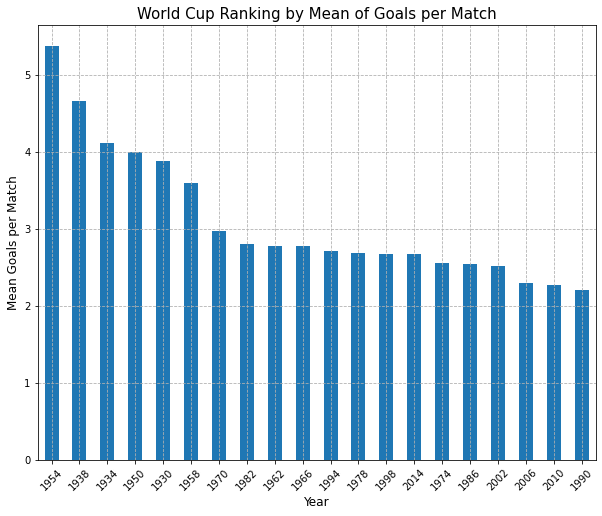

In [7]:
fig, ax = plt.subplots(figsize = (10,8))
meanWorldCupGoals.plot(kind='bar', ax=ax)
ax.set_ylabel('Mean Goals per Match',
              fontsize = 12)
ax.set_xlabel('Year',
              fontsize = 12)
ax.grid('on',
        linestyle = 'dashed')
ax.set_title('World Cup Ranking by Mean of Goals per Match',
             fontsize = 15)
ax.set_xticklabels([int(year) for year in meanWorldCupGoals.keys()],
                  rotation = 45)
plt.show()

## 3.
Construir un ranking de los países que más partidos ganaron por penales. Representarlo en un gráfico igual que en la consigna anterior.

In [8]:
partidos = 'WorldCupMatches.csv' # Definimos la ubicación + nombre de archivo en cuestión

matches = pd.read_csv(partidos) # Levantamos el archivo a través de pandas. Ahora, matches es un Data Frame
matches.dropna(axis=1, how='all',inplace=True) # Elimino filas con todos los valores nan
matches.drop_duplicates(inplace=True)
matches
# Vuelvo a cargar el dataset de partidos

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,2014.0,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
833,2014.0,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
834,2014.0,01 Jul 2014 - 13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI
835,2014.0,01 Jul 2014 - 17:00,Round of 16,Arena Fonte Nova,Salvador,Belgium,2.0,1.0,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951.0,300186497.0,BEL,USA


In [9]:
matches['Win conditions'] = matches['Win conditions'].astype('string') #Convierto esta columna a string (object para pandas)
matches.dtypes

Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           string
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
dtype: object

In [10]:
# Ahora, tomaré los partidos donde hubo algún ganador por penales:
matches_with_penalties = matches[matches['Win conditions'].str.contains('penalties')]
matches_with_penalties

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
357,1982.0,08 Jul 1982 - 21:00,Semi-finals,Ramon Sanchez Pizjuan,Seville,Germany FR,3.0,3.0,France,win on penalties (5 - 4),70000.0,0.0,0.0,CORVER Charles (NED),GALLER Bruno (SUI),VALENTINE Robert (SCO),295.0,914.0,FRG,FRA
404,1986.0,21 Jun 1986 - 12:00,Quarter-finals,Jalisco,Guadalajara,Brazil,1.0,1.0,France,France win on penalties (3 - 4),65000.0,0.0,0.0,IGNA Ioan (ROU),NEMETH Lajos (HUN),CHRISTOV Vojtech (TCH),714.0,440.0,BRA,FRA
405,1986.0,21 Jun 1986 - 16:00,Quarter-finals,Estadio Universitario,Monterrey,Germany FR,0.0,0.0,Mexico,Germany FR win on penalties (4 - 1),41700.0,0.0,0.0,DIAZ PALACIO Jesus (COL),BAMBRIDGE Christopher (AUS),SNODDY Alan (NIR),714.0,575.0,FRG,MEX
406,1986.0,22 Jun 1986 - 16:00,Quarter-finals,Cuauhtemoc,Puebla,Spain,1.0,1.0,Belgium,Belgium win on penalties (4 - 5),45000.0,0.0,0.0,KIRSCHEN Siegfried (GER),CODESAL MENDEZ Edgardo (MEX),BRUMMEIER Horst (AUT),714.0,421.0,ESP,BEL
452,1990.0,25 Jun 1990 - 17:00,Round of 16,Luigi Ferraris,Genoa,"rn"">Republic of Ireland",0.0,0.0,Romania,Republic of Ireland win on penalties (5 - 4),31818.0,0.0,0.0,RAMIZ WRIGHT Jose (BRA),MACIEL Carlos (PAR),MANDI Jassim (BHR),323.0,248.0,IRL,ROU
456,1990.0,30 Jun 1990 - 17:00,Quarter-finals,Comunale,Florence,Yugoslavia,0.0,0.0,Argentina,win on penalties (2 - 3),38971.0,0.0,0.0,ROETHLISBERGER Kurt (SUI),JOUINI Neji (TUN),HANSAL Mohamed (ALG),751.0,31.0,YUG,ARG
460,1990.0,03 Jul 1990 - 20:00,Semi-finals,San Paolo,Naples,Italy,1.0,1.0,Argentina,win on penalties (3 - 4),59978.0,0.0,0.0,VAUTROT Michel (FRA),LISTKIEWICZ Michal (POL),MIKKELSEN Peter (DEN),3464.0,28.0,ITA,ARG
461,1990.0,04 Jul 1990 - 20:00,Semi-finals,Stadio delle Alpi,Turin,Germany FR,1.0,1.0,England,win on penalties (4 - 3),62628.0,0.0,0.0,RAMIZ WRIGHT Jose (BRA),QUINIOU Joel (FRA),PEREZ HOYOS Armando (COL),3464.0,159.0,FRG,ENG
507,1994.0,05 Jul 1994 - 16:30,Round of 16,Giants Stadium,New York/New Jersey,Mexico,1.0,1.0,Bulgaria,Bulgaria win on penalties (1 - 3),71030.0,0.0,0.0,AL SHARIF Jamal (SYR),FANAEI Mohammad (IRN),AL GHATTAN Yousif Abdulla (BAH),338.0,3092.0,MEX,BUL
511,1994.0,10 Jul 1994 - 12:30,Quarter-finals,Stanford Stadium,San Francisco,Romania,2.0,2.0,Sweden,Sweden win on penalties (4 - 5),83500.0,0.0,0.0,DON Philip (ENG),PEARSON Roy (ENG),PARK Hae-Yong (KOR),796.0,3095.0,ROU,SWE


In [11]:
# Ahora, mirando la columna "win conditions" veo que puedo obtener al ganador por penales extrayendo la primera palabra de "X win on penalties"
matches_with_penalties['Winner'] = matches_with_penalties['Win conditions'].str.split(' ').str[0]
matches_with_penalties

C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\1796135886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_penalties['Winner'] = matches_with_penalties['Win conditions'].str.split(' ').str[0]


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner
357,1982.0,08 Jul 1982 - 21:00,Semi-finals,Ramon Sanchez Pizjuan,Seville,Germany FR,3.0,3.0,France,win on penalties (5 - 4),...,0.0,0.0,CORVER Charles (NED),GALLER Bruno (SUI),VALENTINE Robert (SCO),295.0,914.0,FRG,FRA,
404,1986.0,21 Jun 1986 - 12:00,Quarter-finals,Jalisco,Guadalajara,Brazil,1.0,1.0,France,France win on penalties (3 - 4),...,0.0,0.0,IGNA Ioan (ROU),NEMETH Lajos (HUN),CHRISTOV Vojtech (TCH),714.0,440.0,BRA,FRA,France
405,1986.0,21 Jun 1986 - 16:00,Quarter-finals,Estadio Universitario,Monterrey,Germany FR,0.0,0.0,Mexico,Germany FR win on penalties (4 - 1),...,0.0,0.0,DIAZ PALACIO Jesus (COL),BAMBRIDGE Christopher (AUS),SNODDY Alan (NIR),714.0,575.0,FRG,MEX,Germany
406,1986.0,22 Jun 1986 - 16:00,Quarter-finals,Cuauhtemoc,Puebla,Spain,1.0,1.0,Belgium,Belgium win on penalties (4 - 5),...,0.0,0.0,KIRSCHEN Siegfried (GER),CODESAL MENDEZ Edgardo (MEX),BRUMMEIER Horst (AUT),714.0,421.0,ESP,BEL,Belgium
452,1990.0,25 Jun 1990 - 17:00,Round of 16,Luigi Ferraris,Genoa,"rn"">Republic of Ireland",0.0,0.0,Romania,Republic of Ireland win on penalties (5 - 4),...,0.0,0.0,RAMIZ WRIGHT Jose (BRA),MACIEL Carlos (PAR),MANDI Jassim (BHR),323.0,248.0,IRL,ROU,Republic
456,1990.0,30 Jun 1990 - 17:00,Quarter-finals,Comunale,Florence,Yugoslavia,0.0,0.0,Argentina,win on penalties (2 - 3),...,0.0,0.0,ROETHLISBERGER Kurt (SUI),JOUINI Neji (TUN),HANSAL Mohamed (ALG),751.0,31.0,YUG,ARG,
460,1990.0,03 Jul 1990 - 20:00,Semi-finals,San Paolo,Naples,Italy,1.0,1.0,Argentina,win on penalties (3 - 4),...,0.0,0.0,VAUTROT Michel (FRA),LISTKIEWICZ Michal (POL),MIKKELSEN Peter (DEN),3464.0,28.0,ITA,ARG,
461,1990.0,04 Jul 1990 - 20:00,Semi-finals,Stadio delle Alpi,Turin,Germany FR,1.0,1.0,England,win on penalties (4 - 3),...,0.0,0.0,RAMIZ WRIGHT Jose (BRA),QUINIOU Joel (FRA),PEREZ HOYOS Armando (COL),3464.0,159.0,FRG,ENG,
507,1994.0,05 Jul 1994 - 16:30,Round of 16,Giants Stadium,New York/New Jersey,Mexico,1.0,1.0,Bulgaria,Bulgaria win on penalties (1 - 3),...,0.0,0.0,AL SHARIF Jamal (SYR),FANAEI Mohammad (IRN),AL GHATTAN Yousif Abdulla (BAH),338.0,3092.0,MEX,BUL,Bulgaria
511,1994.0,10 Jul 1994 - 12:30,Quarter-finals,Stanford Stadium,San Francisco,Romania,2.0,2.0,Sweden,Sweden win on penalties (4 - 5),...,0.0,0.0,DON Philip (ENG),PEARSON Roy (ENG),PARK Hae-Yong (KOR),796.0,3095.0,ROU,SWE,Sweden


In [12]:
# Houston, tenemos un problema, hay algunos partidos en los cuales no estamos teniendo ganador por penales ya que no está bien cargado el registro.
# Sin embargo, como son pocos partidos (4) en los que eso ocurre, podemos simplemente googlear cual fue el resultado y modificar ese registro.
matches_with_penalties.at[357,'Win conditions']= 'Germany FR win on penalties (5 - 4)'
matches_with_penalties.at[456,'Win conditions']= 'Argentina win on penalties (2 - 3)'
matches_with_penalties.at[460,'Win conditions']= 'Argentina win on penalties (3 - 4)'
matches_with_penalties.at[461,'Win conditions']= 'Germany FR win on penalties (4 - 3)'

matches_with_penalties['Winner'] = matches_with_penalties['Win conditions'].str.split(' ').str[0]

# Además, vemos que Costa Rica aparece como Costa, Corea del Sur aparece como Korea y que Irlanda aparece como Republic, cambiemos eso también:
matches_with_penalties.at[833,'Winner']= 'Costa Rica'
matches_with_penalties.at[452,'Winner']= 'Republic of Ireland'
matches_with_penalties.at[639,'Winner']= 'Korea Republic'

matches_with_penalties

C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\3035191685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_penalties['Winner'] = matches_with_penalties['Win conditions'].str.split(' ').str[0]


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner
357,1982.0,08 Jul 1982 - 21:00,Semi-finals,Ramon Sanchez Pizjuan,Seville,Germany FR,3.0,3.0,France,Germany FR win on penalties (5 - 4),...,0.0,0.0,CORVER Charles (NED),GALLER Bruno (SUI),VALENTINE Robert (SCO),295.0,914.0,FRG,FRA,Germany
404,1986.0,21 Jun 1986 - 12:00,Quarter-finals,Jalisco,Guadalajara,Brazil,1.0,1.0,France,France win on penalties (3 - 4),...,0.0,0.0,IGNA Ioan (ROU),NEMETH Lajos (HUN),CHRISTOV Vojtech (TCH),714.0,440.0,BRA,FRA,France
405,1986.0,21 Jun 1986 - 16:00,Quarter-finals,Estadio Universitario,Monterrey,Germany FR,0.0,0.0,Mexico,Germany FR win on penalties (4 - 1),...,0.0,0.0,DIAZ PALACIO Jesus (COL),BAMBRIDGE Christopher (AUS),SNODDY Alan (NIR),714.0,575.0,FRG,MEX,Germany
406,1986.0,22 Jun 1986 - 16:00,Quarter-finals,Cuauhtemoc,Puebla,Spain,1.0,1.0,Belgium,Belgium win on penalties (4 - 5),...,0.0,0.0,KIRSCHEN Siegfried (GER),CODESAL MENDEZ Edgardo (MEX),BRUMMEIER Horst (AUT),714.0,421.0,ESP,BEL,Belgium
452,1990.0,25 Jun 1990 - 17:00,Round of 16,Luigi Ferraris,Genoa,"rn"">Republic of Ireland",0.0,0.0,Romania,Republic of Ireland win on penalties (5 - 4),...,0.0,0.0,RAMIZ WRIGHT Jose (BRA),MACIEL Carlos (PAR),MANDI Jassim (BHR),323.0,248.0,IRL,ROU,Republic of Ireland
456,1990.0,30 Jun 1990 - 17:00,Quarter-finals,Comunale,Florence,Yugoslavia,0.0,0.0,Argentina,Argentina win on penalties (2 - 3),...,0.0,0.0,ROETHLISBERGER Kurt (SUI),JOUINI Neji (TUN),HANSAL Mohamed (ALG),751.0,31.0,YUG,ARG,Argentina
460,1990.0,03 Jul 1990 - 20:00,Semi-finals,San Paolo,Naples,Italy,1.0,1.0,Argentina,Argentina win on penalties (3 - 4),...,0.0,0.0,VAUTROT Michel (FRA),LISTKIEWICZ Michal (POL),MIKKELSEN Peter (DEN),3464.0,28.0,ITA,ARG,Argentina
461,1990.0,04 Jul 1990 - 20:00,Semi-finals,Stadio delle Alpi,Turin,Germany FR,1.0,1.0,England,Germany FR win on penalties (4 - 3),...,0.0,0.0,RAMIZ WRIGHT Jose (BRA),QUINIOU Joel (FRA),PEREZ HOYOS Armando (COL),3464.0,159.0,FRG,ENG,Germany
507,1994.0,05 Jul 1994 - 16:30,Round of 16,Giants Stadium,New York/New Jersey,Mexico,1.0,1.0,Bulgaria,Bulgaria win on penalties (1 - 3),...,0.0,0.0,AL SHARIF Jamal (SYR),FANAEI Mohammad (IRN),AL GHATTAN Yousif Abdulla (BAH),338.0,3092.0,MEX,BUL,Bulgaria
511,1994.0,10 Jul 1994 - 12:30,Quarter-finals,Stanford Stadium,San Francisco,Romania,2.0,2.0,Sweden,Sweden win on penalties (4 - 5),...,0.0,0.0,DON Philip (ENG),PEARSON Roy (ENG),PARK Hae-Yong (KOR),796.0,3095.0,ROU,SWE,Sweden


In [13]:
# Bien! Ahora sí, podemos ir viendo cómo sería la tendencia haciendo un value counts:
matches_with_penalties['Winner'].value_counts()

Germany                4
Argentina              4
Brazil                 3
France                 2
Ukraine                1
Netherlands            1
Uruguay                1
Paraguay               1
Italy                  1
Portugal               1
Spain                  1
Korea Republic         1
Sweden                 1
Bulgaria               1
Republic of Ireland    1
Belgium                1
Costa Rica             1
Name: Winner, dtype: int64

In [14]:
# Ahora lo que hacemos es guardar ese value counts en un nuevo dataframe auxiliar, ranking_penales:
ranking_penales = pd.DataFrame(matches_with_penalties['Winner'].value_counts().reset_index().values, columns=['Country','Matches won by penalties'])
ranking_penales

,Country,Matches won by penalties
0,Germany,4
1,Argentina,4
2,Brazil,3
3,France,2
4,Ukraine,1
5,Netherlands,1
6,Uruguay,1
7,Paraguay,1
8,Italy,1
9,Portugal,1


<AxesSubplot:xlabel='Country', ylabel='Matches won by penalties'>

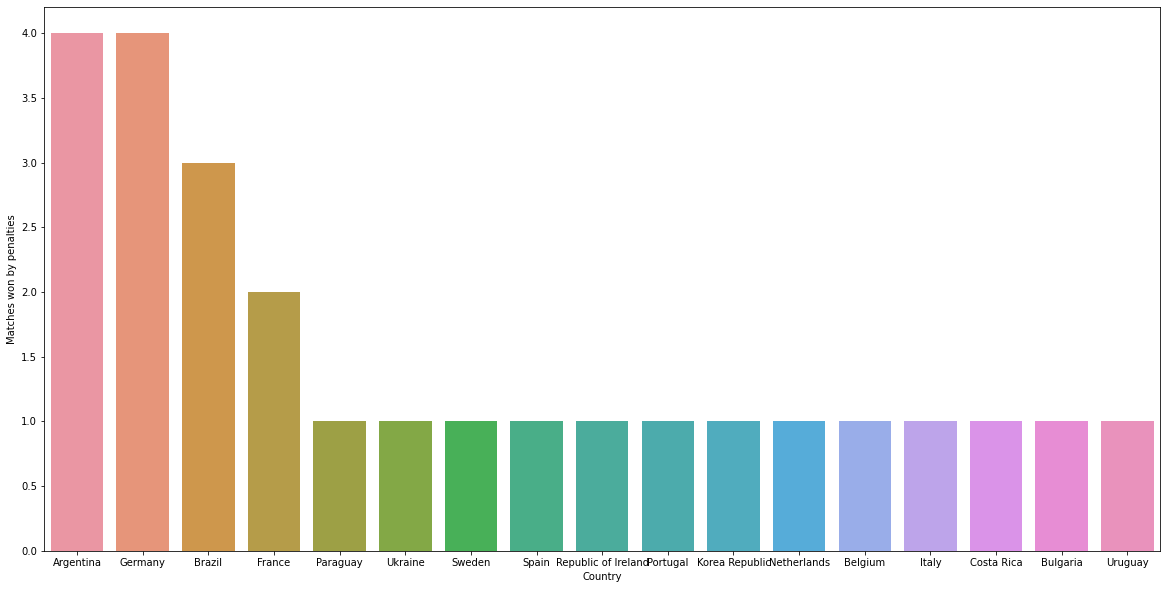

In [15]:
# Finalmente, grafiquemos:
Pais = ranking_penales['Country']
Partidos_ganados_por_penales = ranking_penales['Matches won by penalties']

plot_order = ranking_penales.groupby('Country')['Matches won by penalties'].sum().sort_values(ascending=False).index.values #Para que las barras vayan de mayor a menor

fig, ax = plt.subplots(figsize=(20, 10))
sbn.barplot(x="Country", y="Matches won by penalties", data=ranking_penales, order=plot_order, ax=ax)

## 4.  
¿Quién fue el arquero que más partidos ganó por penales?

In [16]:
# Ahora trabajaremos con el dataset de players. Primero, traigamos de ese dataset (ya cargado) solo a los jugadores que son arqueros (es decir, aquellos que tienen GK en la columna Position)
goalkeepers = players[players['Position']=='GK']
goalkeepers

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
33,201,1090,USA,MILLAR Bob (USA),S,0,Jimmy DOUGLAS,GK,NaN
34,201,1090,BEL,GOETINCK Hector (BEL),S,0,Arnold BADJOU,GK,NaN
65,201,1093,YUG,SIMONOVIC Bosko (YUG),S,0,Milovan JAKSIC,GK,NaN
...,...,...,...,...,...,...,...,...,...
37003,255951,300186497,USA,KLINSMANN Juergen (GER),S,1,HOWARD,GK,NaN
37024,255951,300186497,BEL,WILMOTS Marc (BEL),N,12,MIGNOLET,GK,NaN
37025,255951,300186497,USA,KLINSMANN Juergen (GER),N,12,GUZAN,GK,NaN
37026,255951,300186497,BEL,WILMOTS Marc (BEL),N,13,BOSSUT,GK,NaN


In [17]:
# Bien, ahora, debería mergear este dataframe de goalkeepers con el dataframe anterior de los paises que ganaron por penales por el dato de MatchID:
gk = pd.merge(goalkeepers, matches_with_penalties, how='inner', on='MatchID', suffixes=('', '_drop')) # Mergeo los dataframes marcando con _drop las duplicadas
gk.drop([col for col in gk.columns if 'drop' in col], axis=1, inplace=True) # Droppeo columnas marcadas como duplicadas
gk.columns

Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event', 'Year', 'Datetime',
       'Stage', 'Stadium', 'City', 'Home Team Name', 'Home Team Goals',
       'Away Team Goals', 'Away Team Name', 'Win conditions', 'Attendance',
       'Half-time Home Goals', 'Half-time Away Goals', 'Referee',
       'Assistant 1', 'Assistant 2', 'Home Team Initials',
       'Away Team Initials', 'Winner'],
      dtype='object')

In [18]:
gk #Veamos qué datos tenemos disponibles para trabajar ahora

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Winner
0,295,914,FRG,DERWALL Jupp (GER),S,1,Harald SCHUMACHER,GK,NaN,1982.0,...,Germany FR win on penalties (5 - 4),70000.0,0.0,0.0,CORVER Charles (NED),GALLER Bruno (SUI),VALENTINE Robert (SCO),FRG,FRA,Germany
1,295,914,FRA,HIDALGO Michel (FRA),S,22,Jean Luc ETTORI,GK,NaN,1982.0,...,Germany FR win on penalties (5 - 4),70000.0,0.0,0.0,CORVER Charles (NED),GALLER Bruno (SUI),VALENTINE Robert (SCO),FRG,FRA,Germany
2,714,440,BRA,SANTANA Tele (BRA),S,1,CARLOS,GK,NaN,1986.0,...,France win on penalties (3 - 4),65000.0,0.0,0.0,IGNA Ioan (ROU),NEMETH Lajos (HUN),CHRISTOV Vojtech (TCH),BRA,FRA,France
3,714,440,FRA,MICHEL Henri (FRA),S,1,Joel BATS,GK,NaN,1986.0,...,France win on penalties (3 - 4),65000.0,0.0,0.0,IGNA Ioan (ROU),NEMETH Lajos (HUN),CHRISTOV Vojtech (TCH),BRA,FRA,France
4,714,575,FRG,BECKENBAUER Franz (GER),S,1,Harald SCHUMACHER,GK,NaN,1986.0,...,Germany FR win on penalties (4 - 1),41700.0,0.0,0.0,DIAZ PALACIO Jesus (COL),BAMBRIDGE Christopher (AUS),SNODDY Alan (NIR),FRG,MEX,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,255951,300186459,GRE,SANTOS Fernando (POR),S,1,KARNEZIS,GK,NaN,2014.0,...,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),CRC,GRE,Costa Rica
77,255951,300186459,CRC,PINTO Jorge Luis (COL),N,18,PEMBERTON P.,GK,NaN,2014.0,...,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),CRC,GRE,Costa Rica
78,255951,300186459,GRE,SANTOS Fernando (POR),N,12,GLYKOS,GK,NaN,2014.0,...,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),CRC,GRE,Costa Rica
79,255951,300186459,CRC,PINTO Jorge Luis (COL),N,23,CAMBRONERO D.,GK,NaN,2014.0,...,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),CRC,GRE,Costa Rica


In [19]:
# Ahora, lo que me interesaría es quedarme solo con aquellos datos en donde el arquero pertenezca al equipo ganador. Vamos a ver cómo podemos lograrlo.
# Una forma que se me ocurre es tomar el dataframe matches_with_penalties, y reemplazar a la columna de equipos ganadores (Winner) con sus respectivas iniciales.
# Así de esa forma, luego podría quedarme con aquellos arqueros cuyo código de equipo sea igual al código del ganador. Recapitulemos qué equipos ganaron por penales:
matches_with_penalties['Winner'].value_counts()

Germany                4
Argentina              4
Brazil                 3
France                 2
Ukraine                1
Netherlands            1
Uruguay                1
Paraguay               1
Italy                  1
Portugal               1
Spain                  1
Korea Republic         1
Sweden                 1
Bulgaria               1
Republic of Ireland    1
Belgium                1
Costa Rica             1
Name: Winner, dtype: int64

In [20]:
matches_with_penalties

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner
357,1982.0,08 Jul 1982 - 21:00,Semi-finals,Ramon Sanchez Pizjuan,Seville,Germany FR,3.0,3.0,France,Germany FR win on penalties (5 - 4),...,0.0,0.0,CORVER Charles (NED),GALLER Bruno (SUI),VALENTINE Robert (SCO),295.0,914.0,FRG,FRA,Germany
404,1986.0,21 Jun 1986 - 12:00,Quarter-finals,Jalisco,Guadalajara,Brazil,1.0,1.0,France,France win on penalties (3 - 4),...,0.0,0.0,IGNA Ioan (ROU),NEMETH Lajos (HUN),CHRISTOV Vojtech (TCH),714.0,440.0,BRA,FRA,France
405,1986.0,21 Jun 1986 - 16:00,Quarter-finals,Estadio Universitario,Monterrey,Germany FR,0.0,0.0,Mexico,Germany FR win on penalties (4 - 1),...,0.0,0.0,DIAZ PALACIO Jesus (COL),BAMBRIDGE Christopher (AUS),SNODDY Alan (NIR),714.0,575.0,FRG,MEX,Germany
406,1986.0,22 Jun 1986 - 16:00,Quarter-finals,Cuauhtemoc,Puebla,Spain,1.0,1.0,Belgium,Belgium win on penalties (4 - 5),...,0.0,0.0,KIRSCHEN Siegfried (GER),CODESAL MENDEZ Edgardo (MEX),BRUMMEIER Horst (AUT),714.0,421.0,ESP,BEL,Belgium
452,1990.0,25 Jun 1990 - 17:00,Round of 16,Luigi Ferraris,Genoa,"rn"">Republic of Ireland",0.0,0.0,Romania,Republic of Ireland win on penalties (5 - 4),...,0.0,0.0,RAMIZ WRIGHT Jose (BRA),MACIEL Carlos (PAR),MANDI Jassim (BHR),323.0,248.0,IRL,ROU,Republic of Ireland
456,1990.0,30 Jun 1990 - 17:00,Quarter-finals,Comunale,Florence,Yugoslavia,0.0,0.0,Argentina,Argentina win on penalties (2 - 3),...,0.0,0.0,ROETHLISBERGER Kurt (SUI),JOUINI Neji (TUN),HANSAL Mohamed (ALG),751.0,31.0,YUG,ARG,Argentina
460,1990.0,03 Jul 1990 - 20:00,Semi-finals,San Paolo,Naples,Italy,1.0,1.0,Argentina,Argentina win on penalties (3 - 4),...,0.0,0.0,VAUTROT Michel (FRA),LISTKIEWICZ Michal (POL),MIKKELSEN Peter (DEN),3464.0,28.0,ITA,ARG,Argentina
461,1990.0,04 Jul 1990 - 20:00,Semi-finals,Stadio delle Alpi,Turin,Germany FR,1.0,1.0,England,Germany FR win on penalties (4 - 3),...,0.0,0.0,RAMIZ WRIGHT Jose (BRA),QUINIOU Joel (FRA),PEREZ HOYOS Armando (COL),3464.0,159.0,FRG,ENG,Germany
507,1994.0,05 Jul 1994 - 16:30,Round of 16,Giants Stadium,New York/New Jersey,Mexico,1.0,1.0,Bulgaria,Bulgaria win on penalties (1 - 3),...,0.0,0.0,AL SHARIF Jamal (SYR),FANAEI Mohammad (IRN),AL GHATTAN Yousif Abdulla (BAH),338.0,3092.0,MEX,BUL,Bulgaria
511,1994.0,10 Jul 1994 - 12:30,Quarter-finals,Stanford Stadium,San Francisco,Romania,2.0,2.0,Sweden,Sweden win on penalties (4 - 5),...,0.0,0.0,DON Philip (ENG),PEARSON Roy (ENG),PARK Hae-Yong (KOR),796.0,3095.0,ROU,SWE,Sweden


In [21]:
# Estoy notando un problema que antes no tenía por la forma en la que la columna está cargada, Alemania tiene dos claves de equipo distintas, 
# una para Alemania Occidental (FRG) y otra para la Alemania moderna (GER). Lo que voy a hacer es reemplazar todas las apariciones de FRG por GER para uniformizar los datos.
matches_with_penalties['Home Team Initials'] = matches_with_penalties['Home Team Initials'].str.replace('FRG','GER')
matches_with_penalties['Away Team Initials'] = matches_with_penalties['Away Team Initials'].str.replace('FRG','GER')
gk['Team Initials'] = gk['Team Initials'].str.replace('FRG','GER') #Ya que estamos reemplacemos también en el dataframe mergeado
matches_with_penalties

C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\2788107018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_penalties['Home Team Initials'] = matches_with_penalties['Home Team Initials'].str.replace('FRG','GER')
C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\2788107018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_penalties['Away Team Initials'] = matches_with_penalties['Away Team Initials'].str.replace('FRG','GER')


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner
357,1982.0,08 Jul 1982 - 21:00,Semi-finals,Ramon Sanchez Pizjuan,Seville,Germany FR,3.0,3.0,France,Germany FR win on penalties (5 - 4),...,0.0,0.0,CORVER Charles (NED),GALLER Bruno (SUI),VALENTINE Robert (SCO),295.0,914.0,GER,FRA,Germany
404,1986.0,21 Jun 1986 - 12:00,Quarter-finals,Jalisco,Guadalajara,Brazil,1.0,1.0,France,France win on penalties (3 - 4),...,0.0,0.0,IGNA Ioan (ROU),NEMETH Lajos (HUN),CHRISTOV Vojtech (TCH),714.0,440.0,BRA,FRA,France
405,1986.0,21 Jun 1986 - 16:00,Quarter-finals,Estadio Universitario,Monterrey,Germany FR,0.0,0.0,Mexico,Germany FR win on penalties (4 - 1),...,0.0,0.0,DIAZ PALACIO Jesus (COL),BAMBRIDGE Christopher (AUS),SNODDY Alan (NIR),714.0,575.0,GER,MEX,Germany
406,1986.0,22 Jun 1986 - 16:00,Quarter-finals,Cuauhtemoc,Puebla,Spain,1.0,1.0,Belgium,Belgium win on penalties (4 - 5),...,0.0,0.0,KIRSCHEN Siegfried (GER),CODESAL MENDEZ Edgardo (MEX),BRUMMEIER Horst (AUT),714.0,421.0,ESP,BEL,Belgium
452,1990.0,25 Jun 1990 - 17:00,Round of 16,Luigi Ferraris,Genoa,"rn"">Republic of Ireland",0.0,0.0,Romania,Republic of Ireland win on penalties (5 - 4),...,0.0,0.0,RAMIZ WRIGHT Jose (BRA),MACIEL Carlos (PAR),MANDI Jassim (BHR),323.0,248.0,IRL,ROU,Republic of Ireland
456,1990.0,30 Jun 1990 - 17:00,Quarter-finals,Comunale,Florence,Yugoslavia,0.0,0.0,Argentina,Argentina win on penalties (2 - 3),...,0.0,0.0,ROETHLISBERGER Kurt (SUI),JOUINI Neji (TUN),HANSAL Mohamed (ALG),751.0,31.0,YUG,ARG,Argentina
460,1990.0,03 Jul 1990 - 20:00,Semi-finals,San Paolo,Naples,Italy,1.0,1.0,Argentina,Argentina win on penalties (3 - 4),...,0.0,0.0,VAUTROT Michel (FRA),LISTKIEWICZ Michal (POL),MIKKELSEN Peter (DEN),3464.0,28.0,ITA,ARG,Argentina
461,1990.0,04 Jul 1990 - 20:00,Semi-finals,Stadio delle Alpi,Turin,Germany FR,1.0,1.0,England,Germany FR win on penalties (4 - 3),...,0.0,0.0,RAMIZ WRIGHT Jose (BRA),QUINIOU Joel (FRA),PEREZ HOYOS Armando (COL),3464.0,159.0,GER,ENG,Germany
507,1994.0,05 Jul 1994 - 16:30,Round of 16,Giants Stadium,New York/New Jersey,Mexico,1.0,1.0,Bulgaria,Bulgaria win on penalties (1 - 3),...,0.0,0.0,AL SHARIF Jamal (SYR),FANAEI Mohammad (IRN),AL GHATTAN Yousif Abdulla (BAH),338.0,3092.0,MEX,BUL,Bulgaria
511,1994.0,10 Jul 1994 - 12:30,Quarter-finals,Stanford Stadium,San Francisco,Romania,2.0,2.0,Sweden,Sweden win on penalties (4 - 5),...,0.0,0.0,DON Philip (ENG),PEARSON Roy (ENG),PARK Hae-Yong (KOR),796.0,3095.0,ROU,SWE,Sweden


In [22]:
matches_with_penalties['Winner'].value_counts()

Germany                4
Argentina              4
Brazil                 3
France                 2
Ukraine                1
Netherlands            1
Uruguay                1
Paraguay               1
Italy                  1
Portugal               1
Spain                  1
Korea Republic         1
Sweden                 1
Bulgaria               1
Republic of Ireland    1
Belgium                1
Costa Rica             1
Name: Winner, dtype: int64

In [23]:
# Ahora, armo una función manualmente con los datos que tenía anteriormente, lo que va a hacer es reemplazar al ganador por las iniciales de su equipo 
# (ya que después de todo, nos quedaremos con el GK, no con el nombre del equipo).
gk['Winner'] = gk['Winner'].str.replace('Argentina','ARG')
gk['Winner'] = gk['Winner'].str.replace('Germany','GER')
gk['Winner'] = gk['Winner'].str.replace('Brazil','BRA')
gk['Winner'] = gk['Winner'].str.replace('Netherlands','NED')
gk['Winner'] = gk['Winner'].str.replace('France','FRA')
gk['Winner'] = gk['Winner'].str.replace('Costa Rica','CRC')
gk['Winner'] = gk['Winner'].str.replace('Sweden','SWE')
gk['Winner'] = gk['Winner'].str.replace('Bulgaria','BUL')
gk['Winner'] = gk['Winner'].str.replace('Republic of Ireland','IRL')
gk['Winner'] = gk['Winner'].str.replace('Korea Republic','KOR')
gk['Winner'] = gk['Winner'].str.replace('Ukraine','UKR')
gk['Winner'] = gk['Winner'].str.replace('Portugal','POR')
gk['Winner'] = gk['Winner'].str.replace('Italy','ITA')
gk['Winner'] = gk['Winner'].str.replace('Paraguay','PAR')
gk['Winner'] = gk['Winner'].str.replace('Uruguay','URU')
gk['Winner'] = gk['Winner'].str.replace('Belgium','BEL')
gk['Winner'] = gk['Winner'].str.replace('Spain','ESP')
gk

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Winner
0,295,914,GER,DERWALL Jupp (GER),S,1,Harald SCHUMACHER,GK,NaN,1982.0,...,Germany FR win on penalties (5 - 4),70000.0,0.0,0.0,CORVER Charles (NED),GALLER Bruno (SUI),VALENTINE Robert (SCO),FRG,FRA,GER
1,295,914,FRA,HIDALGO Michel (FRA),S,22,Jean Luc ETTORI,GK,NaN,1982.0,...,Germany FR win on penalties (5 - 4),70000.0,0.0,0.0,CORVER Charles (NED),GALLER Bruno (SUI),VALENTINE Robert (SCO),FRG,FRA,GER
2,714,440,BRA,SANTANA Tele (BRA),S,1,CARLOS,GK,NaN,1986.0,...,France win on penalties (3 - 4),65000.0,0.0,0.0,IGNA Ioan (ROU),NEMETH Lajos (HUN),CHRISTOV Vojtech (TCH),BRA,FRA,FRA
3,714,440,FRA,MICHEL Henri (FRA),S,1,Joel BATS,GK,NaN,1986.0,...,France win on penalties (3 - 4),65000.0,0.0,0.0,IGNA Ioan (ROU),NEMETH Lajos (HUN),CHRISTOV Vojtech (TCH),BRA,FRA,FRA
4,714,575,GER,BECKENBAUER Franz (GER),S,1,Harald SCHUMACHER,GK,NaN,1986.0,...,Germany FR win on penalties (4 - 1),41700.0,0.0,0.0,DIAZ PALACIO Jesus (COL),BAMBRIDGE Christopher (AUS),SNODDY Alan (NIR),FRG,MEX,GER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,255951,300186459,GRE,SANTOS Fernando (POR),S,1,KARNEZIS,GK,NaN,2014.0,...,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),CRC,GRE,CRC
77,255951,300186459,CRC,PINTO Jorge Luis (COL),N,18,PEMBERTON P.,GK,NaN,2014.0,...,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),CRC,GRE,CRC
78,255951,300186459,GRE,SANTOS Fernando (POR),N,12,GLYKOS,GK,NaN,2014.0,...,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),CRC,GRE,CRC
79,255951,300186459,CRC,PINTO Jorge Luis (COL),N,23,CAMBRONERO D.,GK,NaN,2014.0,...,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),CRC,GRE,CRC


In [24]:
# Bien! Ahora solo me quedaré con aquellas filas del dataframe donde Team Initials sea igual a Winner, así obtendré a los arqueros que ganaron por penales.
gk = gk[gk['Team Initials'] == gk['Winner']]
gk = gk.drop_duplicates(subset=['MatchID', 'Datetime','Player Name'], keep='first') #Droppeo aquellos registros donde el MatchID, la fecha y el Player Name sean iguales.
gk.drop(gk[gk['Player Name'] == "CILLESSEN"].index, inplace = True)
gk.drop(gk[gk['Player Name'] == "VORM"].index, inplace = True)
#Mirando el partido con MatchID = 300186488, vemos que para los penales entró KRUL, 
#así que nos deberíamos deshacer de los otros arqueros ya que ellos no ganaron la tanda de penales.

In [25]:
# Vemos que salvo en el partido anteriormente indicado, los titulares siguieron atajando los penales. Filtremos y quedémonos solo con los titulares + Krul.
gk = gk[(gk['Player Name'] == "KRUL") | (gk['Line-up'] == "S")]
gk

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Winner
0,295,914,GER,DERWALL Jupp (GER),S,1,Harald SCHUMACHER,GK,NaN,1982.0,...,Germany FR win on penalties (5 - 4),70000.0,0.0,0.0,CORVER Charles (NED),GALLER Bruno (SUI),VALENTINE Robert (SCO),FRG,FRA,GER
3,714,440,FRA,MICHEL Henri (FRA),S,1,Joel BATS,GK,NaN,1986.0,...,France win on penalties (3 - 4),65000.0,0.0,0.0,IGNA Ioan (ROU),NEMETH Lajos (HUN),CHRISTOV Vojtech (TCH),BRA,FRA,FRA
4,714,575,GER,BECKENBAUER Franz (GER),S,1,Harald SCHUMACHER,GK,NaN,1986.0,...,Germany FR win on penalties (4 - 1),41700.0,0.0,0.0,DIAZ PALACIO Jesus (COL),BAMBRIDGE Christopher (AUS),SNODDY Alan (NIR),FRG,MEX,GER
7,714,421,BEL,THYS Guy (BEL),S,1,Jean Marie PFAFF,GK,NaN,1986.0,...,Belgium win on penalties (4 - 5),45000.0,0.0,0.0,KIRSCHEN Siegfried (GER),CODESAL MENDEZ Edgardo (MEX),BRUMMEIER Horst (AUT),ESP,BEL,BEL
8,323,248,IRL,CHARLTON Jack (ENG),S,1,Pat BONNER,GK,NaN,1990.0,...,Republic of Ireland win on penalties (5 - 4),31818.0,0.0,0.0,RAMIZ WRIGHT Jose (BRA),MACIEL Carlos (PAR),MANDI Jassim (BHR),IRL,ROU,IRL
10,751,31,ARG,BILARDO Carlos (ARG),S,12,Sergio GOYCOCHEA,GK,NaN,1990.0,...,Argentina win on penalties (2 - 3),38971.0,0.0,0.0,ROETHLISBERGER Kurt (SUI),JOUINI Neji (TUN),HANSAL Mohamed (ALG),YUG,ARG,ARG
12,3464,28,ARG,BILARDO Carlos (ARG),S,12,Sergio GOYCOCHEA,GK,NaN,1990.0,...,Argentina win on penalties (3 - 4),59978.0,0.0,0.0,VAUTROT Michel (FRA),LISTKIEWICZ Michal (POL),MIKKELSEN Peter (DEN),ITA,ARG,ARG
18,3464,159,GER,BECKENBAUER Franz (GER),S,1,Bodo ILLGNER,GK,NaN,1990.0,...,Germany FR win on penalties (4 - 3),62628.0,0.0,0.0,RAMIZ WRIGHT Jose (BRA),QUINIOU Joel (FRA),PEREZ HOYOS Armando (COL),FRG,ENG,GER
22,796,3095,SWE,SVENSSON Tommy (SWE),S,1,Thomas RAVELLI,GK,NaN,1994.0,...,Sweden win on penalties (4 - 5),83500.0,0.0,0.0,DON Philip (ENG),PEARSON Roy (ENG),PARK Hae-Yong (KOR),ROU,SWE,SWE
23,3459,3104,BRA,PARREIRA Carlos Alberto (BRA),S,1,TAFFAREL,GK,NaN,1994.0,...,Brazil win on penalties (3 - 2),94194.0,0.0,0.0,PUHL Sandor (HUN),ZARATE Venancio (PAR),FANAEI Mohammad (IRN),BRA,ITA,BRA


In [26]:
# Genial, ahora se parece más a los problemas anteriores. Hago un value count para saber cómo es más o menos la tendencia y luego lo almaceno en un dataframe auxiliar.
gk['Player Name'].value_counts()

Harald SCHUMACHER    2
Sergio GOYCOCHEA     2
TAFFAREL             2
SHOVKOVSKYI          1
KRUL                 1
ROMERO               1
JULIO CESAR          1
MUSLERA              1
BUFFON               1
RICARDO              1
LEHMANN              1
CASILLAS             1
W J LEE              1
Joel BATS            1
Fabien BARTHEZ       1
Carlos ROA           1
Thomas RAVELLI       1
Bodo ILLGNER         1
Pat BONNER           1
Jean Marie PFAFF     1
NAVAS K.             1
Name: Player Name, dtype: int64

In [27]:
# Ahora lo que hacemos es guardar ese value counts en un nuevo dataframe auxiliar, ranking_gk_penales:
ranking_gk_penales = pd.DataFrame(gk['Player Name'].value_counts().reset_index().values, columns=['Player Name','Matches won by penalties'])
ranking_gk_penales

,Player Name,Matches won by penalties
0,Harald SCHUMACHER,2
1,Sergio GOYCOCHEA,2
2,TAFFAREL,2
3,SHOVKOVSKYI,1
4,KRUL,1
5,ROMERO,1
6,JULIO CESAR,1
7,MUSLERA,1
8,BUFFON,1
9,RICARDO,1


<AxesSubplot:xlabel='Player Name', ylabel='Matches won by penalties'>

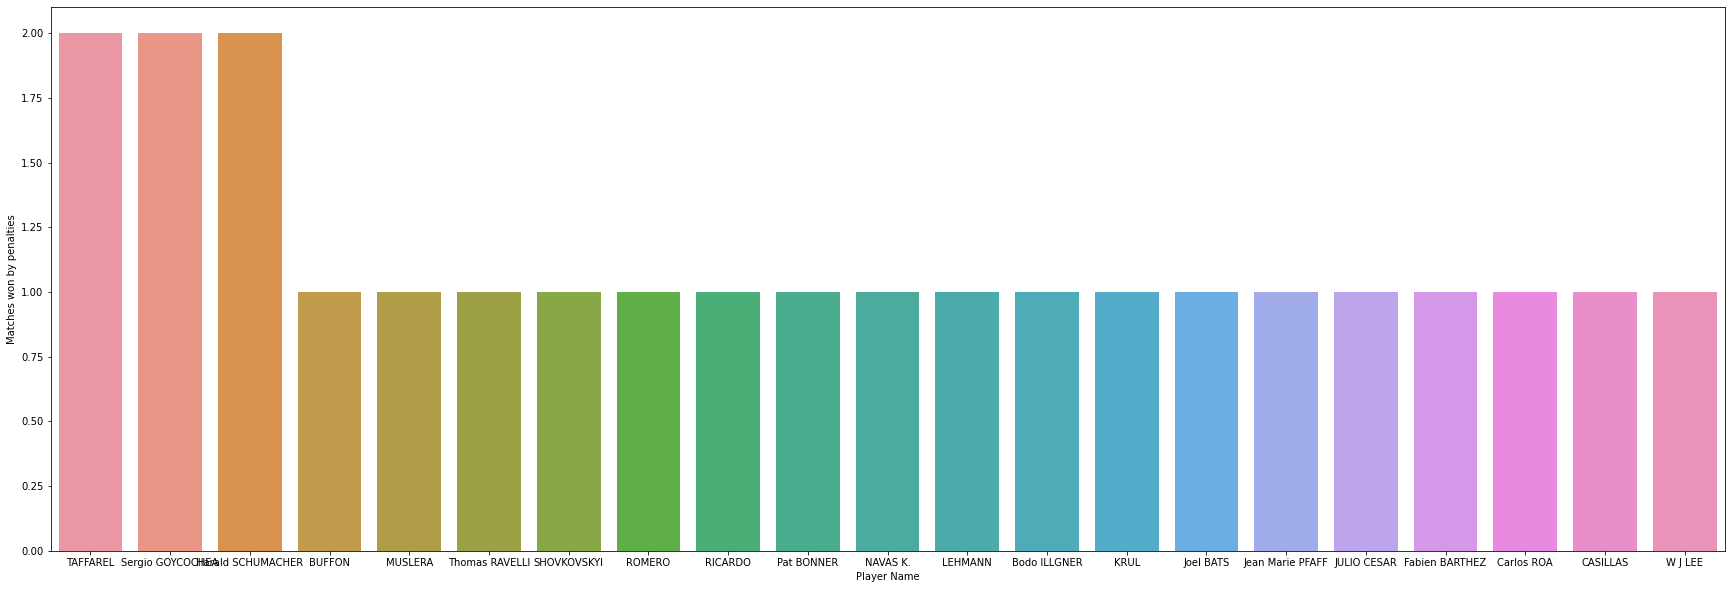

In [28]:
# Se ve que no hay un ganador claro de quién ganó más partidos por penales, pero igualmente, grafiquemos:
Arquero = ranking_gk_penales['Player Name']
Partidos_ganados_por_penales = ranking_gk_penales['Matches won by penalties']

plot_order = ranking_gk_penales.groupby('Player Name')['Matches won by penalties'].sum().sort_values(ascending=False).index.values #Para que las barras vayan de mayor a menor

fig, ax = plt.subplots(figsize=(30, 10))
sbn.barplot(x="Player Name", y="Matches won by penalties", data=ranking_gk_penales, order=plot_order, ax=ax)

In [29]:
# Para desempatar, veamos cómo queda este ranking por país:
gk['Winner'].value_counts()

GER    4
ARG    4
BRA    3
FRA    2
BEL    1
IRL    1
SWE    1
ESP    1
KOR    1
UKR    1
POR    1
ITA    1
URU    1
NED    1
CRC    1
Name: Winner, dtype: int64

# 5.
Construir un histograma que muestra como están distribuidos los goles a lo largo de la duración de un partido. Es decir, armar un gráfico que divida los '90 minutos de un partido en bines de 4 minutos en el eje X, y que tenga en el eje Y la cantidad total de goles anotados en el bin correspondiente.

In [30]:
# Cargo el dataframe de jugadores y me quedo solo con aquellos que hicieron un gol, así puedo ir viendo los tiempos de gol.
jugadores = 'WorldCupPlayers.csv' # Definimos la ubicación + nombre de archivo en cuestión

players = pd.read_csv(jugadores) # Levantamos el archivo a través de pandas. Ahora, players es un Data Frame
players.dropna(axis=1, how='all',inplace=True) # Elimino filas con todos los valores nan
players.drop_duplicates(inplace=True)
players.columns

Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event'],
      dtype='object')

In [31]:
players = players.drop_duplicates(subset=['MatchID','RoundID','Player Name'], keep='first') #Droppeo aquellos registros donde el MatchID, la ronda y el Player Name sean iguales (elimino duplicados)
players['Event'] = players['Event'].astype('string') #Convierto esta columna a string (object para pandas)
players = players[players['Event'].str.contains('G')] #Me quedo solo con aquelos jugadores que hayan metido algún gol.
players

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19'
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
...,...,...,...,...,...,...,...,...,...
36927,255951,300186459,GRE,SANTOS Fernando (POR),S,19,SOKRATIS,NaN,G90'
36964,255951,300186503,ARG,SABELLA Alejandro (ARG),S,7,DI MARIA,NaN,G118' Y120'
37012,255951,300186497,BEL,WILMOTS Marc (BEL),S,7,DE BRUYNE,NaN,G93'
37030,255951,300186497,BEL,WILMOTS Marc (BEL),N,9,LUKAKU,NaN,I91' G105'


In [32]:
#Ahora, debo quedarme solo con los goles. Para ello, tomo cada evento como si fueran "palabras" y elimino todas aquellas que no empiezan con G (es decir, todos los eventos que no son goles).
#https://stackoverflow.com/questions/66569634/removing-words-starting-with-http-in-a-pandas-dataframe
#Hago una línea de comando por cada evento.
"""El código completo para "Events" es:

G = Goal
Y = Yellow card
RSY = Red card by second yellow card
R = Red card
O = Substitution out
I = Substitution in
OH = Substitution out in the half-time
IH = Substitution in in the half-time
W = Own goal
P = Penalty scored
MP = Missed Penalty
U = Unknown event"""

#Los goles de penal los contaremos también y haremos un histograma de los goles marcados en los 90 minutos + 30 tiempo extra = 120 minutos totales.
players['Event'] = players['Event'].str.replace('I[^\s]*',"")
players['Event'] = players['Event'].str.replace('Y[^\s]*',"")
players['Event'] = players['Event'].str.replace('RSY[^\s]*',"")
players['Event'] = players['Event'].str.replace('R[^\s]*',"")
players['Event'] = players['Event'].str.replace('O[^\s]*',"")
players['Event'] = players['Event'].str.replace('OH[^\s]*',"")
players['Event'] = players['Event'].str.replace('IH[^\s]*',"")
players['Event'] = players['Event'].str.replace('W[^\s]*',"")
players['Event'] = players['Event'].str.replace('MP[^\s]*',"")
players['Event'] = players['Event'].str.replace('U[^\s]*',"")
players

C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\3403601518.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  players['Event'] = players['Event'].str.replace('I[^\s]*',"")
C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\3403601518.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  players['Event'] = players['Event'].str.replace('Y[^\s]*',"")
C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\3403601518.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  players['Event'] = players['Event'].str.replace('RSY[^\s]*',"")
C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\3403601518.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  players['Event'] = players['Event'].str.replace('R[^\s]*',"")
C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\3403601518.py:24: FutureWarning: The default

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19'
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
...,...,...,...,...,...,...,...,...,...
36927,255951,300186459,GRE,SANTOS Fernando (POR),S,19,SOKRATIS,NaN,G90'
36964,255951,300186503,ARG,SABELLA Alejandro (ARG),S,7,DI MARIA,NaN,G118'
37012,255951,300186497,BEL,WILMOTS Marc (BEL),S,7,DE BRUYNE,NaN,G93'
37030,255951,300186497,BEL,WILMOTS Marc (BEL),N,9,LUKAKU,NaN,G105'


In [33]:
#Ahora, me conviene cambiar todas las P por G, para así uniformizar y contar a los penales en la misma categoría que los goles.
players["Event"] = players["Event"].str.replace("P", "G")
players

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19'
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
...,...,...,...,...,...,...,...,...,...
36927,255951,300186459,GRE,SANTOS Fernando (POR),S,19,SOKRATIS,NaN,G90'
36964,255951,300186503,ARG,SABELLA Alejandro (ARG),S,7,DI MARIA,NaN,G118'
37012,255951,300186497,BEL,WILMOTS Marc (BEL),S,7,DE BRUYNE,NaN,G93'
37030,255951,300186497,BEL,WILMOTS Marc (BEL),N,9,LUKAKU,NaN,G105'


In [34]:
#Me conviene crear una nueva fila para los jugadores que hicieron más de un gol, de forma tal que por ejemplo, un jugador que hizo un gol a los 10, 15 y 20 minutos,
# tenga 3 registros, uno por cada gol. Así se hace más fácil contar luego las ocurrencias de cada gol a cada minuto.
# Esto lo hago con el método Explode aplicado a la columna Event (https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows)
players = players.assign(Event=players['Event'].str.split(' ')).explode("Event")
# Aquí vemos que hay varios cuyo minuto de conversión está sin marcar, y mirando en detalle el dataframe vemos que son de hecho duplicados de otros goles.
# El problema viene de que estos duplicados están muy mezclados y no podemos decir nada claro respecto a con cual queremos quedarnos (el primer o segundo registro)
# por lo cual la técnica que veníamos usando, 
# df = df.drop_duplicates(subset=['MatchID', 'Player Name', 'Team Initials'], keep='first') #Droppeamos los goles repetidos
# no nos sirve. Lo que haremos será eliminar estos registros que contienen a los goles sin marcar, ya que de todas formas sabemos que son duplicados, y trabajamos con los demás.
players = players['Event'].replace('', np.nan, inplace=False) #Todos las celdas vacías las convierto a np.nan para que pandas las reconozca y las droppee
players.dropna(inplace=True)
players = pd.DataFrame(players)

In [35]:
players

,Event
2,G40'
3,G70'
6,G43'
6,G87'
14,G19'
...,...
36927,G90'
36964,G118'
37012,G93'
37030,G105'


In [36]:
# Cuento entonces, las ocurrencias de cada G de 0 a 120 para ir viendo la tendencia dentro de la columna Event y convierto el value counts a dataframe
# (porque ya sé que todos los eventos que tengo son goles o penales marcados)
# Ahora lo que hacemos es guardar ese value counts en un nuevo dataframe auxiliar, goles:
goles = pd.DataFrame(players['Event'].value_counts().reset_index().values, columns=['Minute','Goals'])
goles

,Minute,Goals
0,G90',62
1,G75',42
2,G18',37
3,G83',35
4,G73',35
...,...,...
111,G117',1
112,G99',1
113,G91',1
114,G103',1


In [37]:
players = players.reset_index()
players['Event'] = players['Event'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int) #Aquí lo que hago es sacar todo lo que no sea un número y lo que queda lo hago int para que el histograma pueda ordenar.
#https://www.pauldesalvo.com/how-to-extract-all-numbers-from-a-string-column-in-python-pandas/
players = players.sort_values(by=['Event']) #Ordeno los eventos de forma ascendente para que el histograma quede bien
players

,index,Event
693,8356,1
1560,24181,1
2073,34711,1
201,1992,1
11,112,1
...,...,...
1895,30980,119
2169,36493,120
711,8537,120
2167,36456,120


Text(0.5, 1.0, 'DISTRIBUCIÓN DE GOLES A LO LARGO DEL PARTIDO')

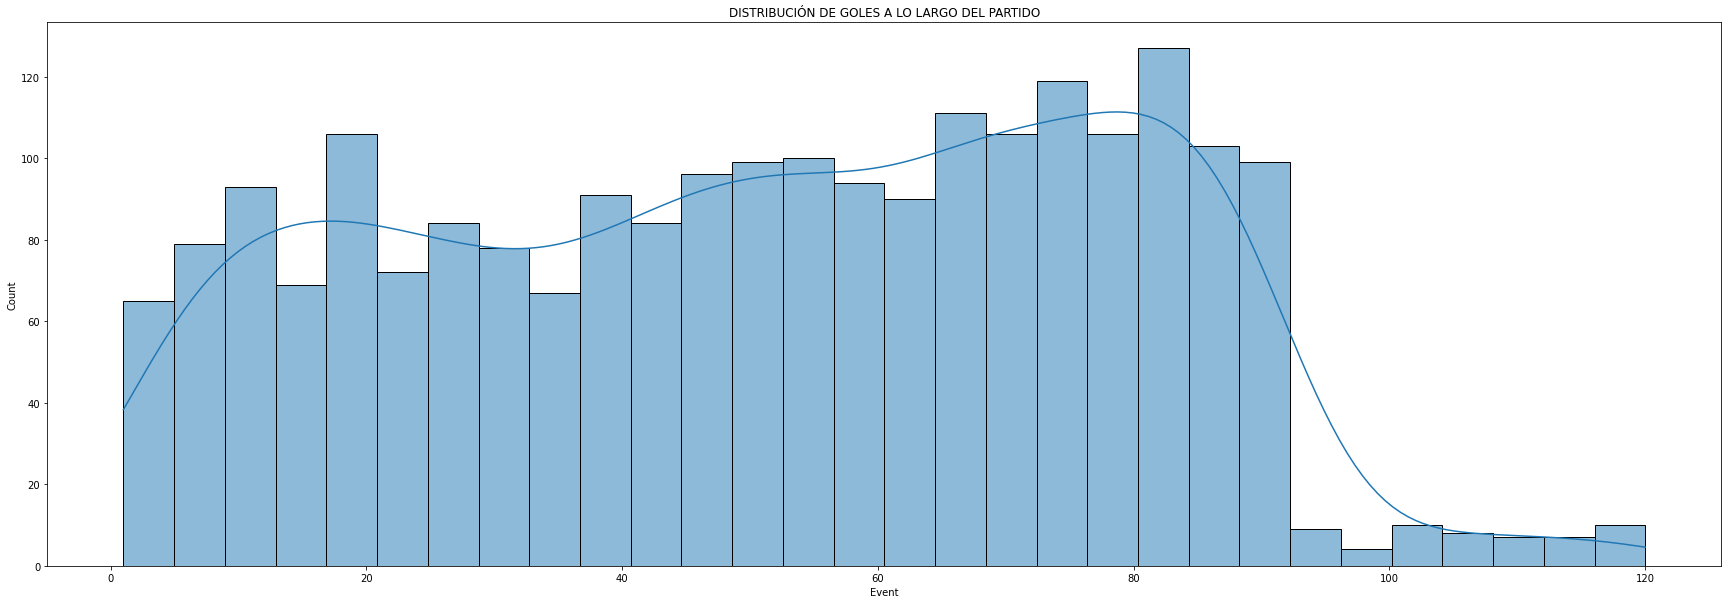

In [38]:
fig, ax = plt.subplots(figsize=(30, 10))
sbn.histplot(data=players, x="Event", bins=30, kde=True, ax=ax).set_title('DISTRIBUCIÓN DE GOLES A LO LARGO DEL PARTIDO') #Hago un histograma con 30 bines de 4 minutos de ancho (desde 0 a 120) que muestre la distribución

# 6.
Hacerlo por separado para la fase de grupos y para la fase de eliminación (todos los partidos posteriores a la fase de grupos).

In [39]:
#Para esto, lo que haré es mergear desde el MatchID un nuevo dataframe que contenga los datos de los partidos y los jugadores,
#luego, separo ese dataframe en fase de grupos y eliminación, y repito el proceso anterior.

partidos = 'WorldCupMatches.csv' # Definimos la ubicación + nombre de archivo en cuestión
matches = pd.read_csv(partidos) # Levantamos el archivo a través de pandas. Ahora, matches es un Data Frame
matches.dropna(axis=1, how='all',inplace=True) # Elimino filas con todos los valores nan
matches.drop_duplicates(inplace=True)
matches.head


jugadores = 'WorldCupPlayers.csv' # Definimos la ubicación + nombre de archivo en cuestión
players = pd.read_csv(jugadores) # Levantamos el archivo a través de pandas. Ahora, players es un Data Frame
players.dropna(axis=1, how='all',inplace=True) # Elimino filas con todos los valores nan
players.drop_duplicates(inplace=True)
players.head


total = pd.merge(players, matches, how='inner', suffixes=('', '_drop')) # Mergeo los dataframes marcando con _drop las duplicadas
total.drop([col for col in total.columns if 'drop' in col], axis=1, inplace=True) # Droppeo columnas marcadas como duplicadas
total

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN,1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN,1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN,1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37043,255951,300186497,USA,KLINSMANN Juergen (GER),N,17,ALTIDORE,NaN,NaN,2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA
37044,255951,300186497,BEL,WILMOTS Marc (BEL),N,16,DEFOUR,NaN,NaN,2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA
37045,255951,300186497,USA,KLINSMANN Juergen (GER),N,18,WONDOLOWSKI,NaN,I72',2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA
37046,255951,300186497,BEL,WILMOTS Marc (BEL),N,21,VANDEN BORRE,NaN,NaN,2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA


In [40]:
fase_grupos = total[total["Stage"].str.contains('Group')]
eliminatorias = total[~total["Stage"].str.contains('Group')]
fase_grupos

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN,1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN,1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN,1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36307,255931,300186506,RUS,CAPELLO Fabio (ITA),N,18,ZHIRKOV,NaN,NaN,2014.0,...,Russia,,39311.0,0.0,1.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),ALG,RUS
36308,255931,300186506,ALG,HALILHODZIC Vahid (BIH),N,21,MAHREZ,NaN,NaN,2014.0,...,Russia,,39311.0,0.0,1.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),ALG,RUS
36309,255931,300186506,RUS,CAPELLO Fabio (ITA),N,21,IONOV,NaN,NaN,2014.0,...,Russia,,39311.0,0.0,1.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),ALG,RUS
36310,255931,300186506,ALG,HALILHODZIC Vahid (BIH),N,22,MOSTEFA,NaN,NaN,2014.0,...,Russia,,39311.0,0.0,1.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),ALG,RUS


In [41]:
eliminatorias

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials
566,202,1088,ARG,OLAZAR Francisco (ARG),S,0,Juan BOTASSO,GK,NaN,1930.0,...,USA,,72886.0,1.0,0.0,LANGENUS Jean (BEL),VALLEJO Gaspar (MEX),WARNKEN Alberto (CHI),ARG,USA
567,202,1088,USA,MILLAR Bob (USA),S,0,Jimmy DOUGLAS,GK,NaN,1930.0,...,USA,,72886.0,1.0,0.0,LANGENUS Jean (BEL),VALLEJO Gaspar (MEX),WARNKEN Alberto (CHI),ARG,USA
568,202,1088,ARG,OLAZAR Francisco (ARG),S,0,Rodolfo ORLANDINI,NaN,NaN,1930.0,...,USA,,72886.0,1.0,0.0,LANGENUS Jean (BEL),VALLEJO Gaspar (MEX),WARNKEN Alberto (CHI),ARG,USA
569,202,1088,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,NaN,1930.0,...,USA,,72886.0,1.0,0.0,LANGENUS Jean (BEL),VALLEJO Gaspar (MEX),WARNKEN Alberto (CHI),ARG,USA
570,202,1088,ARG,OLAZAR Francisco (ARG),S,0,Fernando PATERNOSTER,NaN,NaN,1930.0,...,USA,,72886.0,1.0,0.0,LANGENUS Jean (BEL),VALLEJO Gaspar (MEX),WARNKEN Alberto (CHI),ARG,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37043,255951,300186497,USA,KLINSMANN Juergen (GER),N,17,ALTIDORE,NaN,NaN,2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA
37044,255951,300186497,BEL,WILMOTS Marc (BEL),N,16,DEFOUR,NaN,NaN,2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA
37045,255951,300186497,USA,KLINSMANN Juergen (GER),N,18,WONDOLOWSKI,NaN,I72',2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA
37046,255951,300186497,BEL,WILMOTS Marc (BEL),N,21,VANDEN BORRE,NaN,NaN,2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA


C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\3128556304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fase_grupos['Event'] = fase_grupos['Event'].astype('string') #Convierto esta columna a string (object para pandas)
C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\3128556304.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  fase_grupos['Event'] = fase_grupos['Event'].str.replace('I[^\s]*',"")
C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\3128556304.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

Text(0.5, 1.0, 'DISTRIBUCIÓN DE GOLES A LO LARGO DEL PARTIDO (FASE DE GRUPOS)')

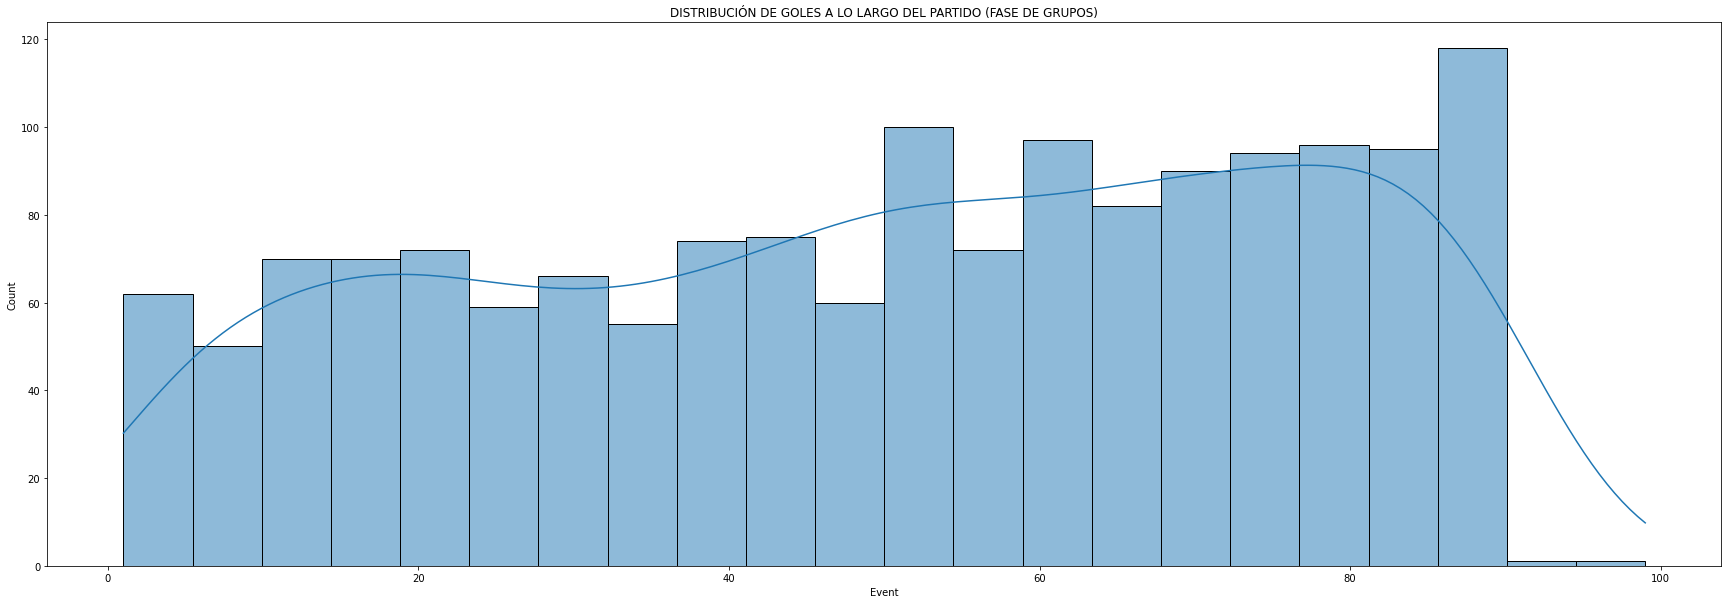

In [42]:
# REPITO EL PROCESO ANTERIOR CON LA FASE DE GRUPOS:
fase_grupos = fase_grupos.drop_duplicates(subset=['MatchID','RoundID','Player Name'], keep='first') #Droppeo aquellos registros donde el MatchID, la ronda y el Player Name sean iguales (elimino duplicados)
fase_grupos['Event'] = fase_grupos['Event'].astype('string') #Convierto esta columna a string (object para pandas)
fase_grupos = fase_grupos[fase_grupos['Event'].str.contains('G')] #Me quedo solo con aquelos jugadores que hayan metido algún gol.


#Ahora, debo quedarme solo con los goles. Para ello, tomo cada evento como si fueran "palabras" y elimino todas aquellas que no empiezan con G (es decir, todos los eventos que no son goles).
#https://stackoverflow.com/questions/66569634/removing-words-starting-with-http-in-a-pandas-dataframe
#Hago una línea de comando por cada evento.
"""El código completo para "Events" es:

G = Goal
Y = Yellow card
RSY = Red card by second yellow card
R = Red card
O = Substitution out
I = Substitution in
OH = Substitution out in the half-time
IH = Substitution in in the half-time
W = Own goal
P = Penalty scored
MP = Missed Penalty
U = Unknown event"""

#Los goles de penal los contaremos también y haremos un histograma de los goles marcados en los 90 minutos + 30 tiempo extra = 120 minutos totales.
fase_grupos['Event'] = fase_grupos['Event'].str.replace('I[^\s]*',"")
fase_grupos['Event'] = fase_grupos['Event'].str.replace('Y[^\s]*',"")
fase_grupos['Event'] = fase_grupos['Event'].str.replace('RSY[^\s]*',"")
fase_grupos['Event'] = fase_grupos['Event'].str.replace('R[^\s]*',"")
fase_grupos['Event'] = fase_grupos['Event'].str.replace('O[^\s]*',"")
fase_grupos['Event'] = fase_grupos['Event'].str.replace('OH[^\s]*',"")
fase_grupos['Event'] = fase_grupos['Event'].str.replace('IH[^\s]*',"")
fase_grupos['Event'] = fase_grupos['Event'].str.replace('W[^\s]*',"")
fase_grupos['Event'] = fase_grupos['Event'].str.replace('MP[^\s]*',"")
fase_grupos['Event'] = fase_grupos['Event'].str.replace('U[^\s]*',"")



#Ahora, me conviene cambiar todas las P por G, para así uniformizar y contar a los penales en la misma categoría que los goles.
fase_grupos["Event"] = fase_grupos["Event"].str.replace("P", "G")


#Me conviene crear una nueva fila para los jugadores que hicieron más de un gol, de forma tal que por ejemplo, un jugador que hizo un gol a los 10, 15 y 20 minutos,
# tenga 3 registros, uno por cada gol. Así se hace más fácil contar luego las ocurrencias de cada gol a cada minuto.
# Esto lo hago con el método Explode aplicado a la columna Event (https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows)
fase_grupos = fase_grupos.assign(Event=fase_grupos['Event'].str.split(' ')).explode("Event")
# Aquí vemos que hay varios cuyo minuto de conversión está sin marcar, y mirando en detalle el dataframe vemos que son de hecho duplicados de otros goles.
# El problema viene de que estos duplicados están muy mezclados y no podemos decir nada claro respecto a con cual queremos quedarnos (el primer o segundo registro)
# por lo cual la técnica que veníamos usando, 
# df = df.drop_duplicates(subset=['MatchID', 'Player Name', 'Team Initials'], keep='first') #Droppeamos los goles repetidos
# no nos sirve. Lo que haremos será eliminar estos registros que contienen a los goles sin marcar, ya que de todas formas sabemos que son duplicados, y trabajamos con los demás.
fase_grupos = fase_grupos['Event'].replace('', np.nan, inplace=False) #Todos las celdas vacías las convierto a np.nan para que pandas las reconozca y las droppee
fase_grupos = fase_grupos.dropna(inplace=False)
fase_grupos = pd.DataFrame(fase_grupos)


# Cuento entonces, las ocurrencias de cada G de 0 a 120 para ir viendo la tendencia dentro de la columna Event y convierto el value counts a dataframe
# (porque ya sé que todos los eventos que tengo son goles o penales marcados)
# Ahora lo que hacemos es guardar ese value counts en un nuevo dataframe auxiliar, goles:
goles_fase_grupos = pd.DataFrame(fase_grupos['Event'].value_counts().reset_index().values, columns=['Minute','Goals'])


fase_grupos = fase_grupos.reset_index()
fase_grupos['Event'] = fase_grupos['Event'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int) #Aquí lo que hago es sacar todo lo que no sea un número y lo que queda lo hago int para que el histograma pueda ordenar.
#https://www.pauldesalvo.com/how-to-extract-all-numbers-from-a-string-column-in-python-pandas/
fase_grupos = fase_grupos.sort_values(by=['Event']) #Ordeno los eventos de forma ascendente para que el histograma quede bien


fig, ax = plt.subplots(figsize=(30, 10))
sbn.histplot(data=fase_grupos, x="Event", bins=22, kde=True, ax=ax).set_title('DISTRIBUCIÓN DE GOLES A LO LARGO DEL PARTIDO (FASE DE GRUPOS)') 
#Hago un histograma con 22 bines de más o menos 4 minutos de ancho (desde 0 a 90) que muestre la distribución

C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\3967201776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eliminatorias['Event'] = eliminatorias['Event'].astype('string') #Convierto esta columna a string (object para pandas)
C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\3967201776.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  eliminatorias['Event'] = eliminatorias['Event'].str.replace('I[^\s]*',"")
C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\3967201776.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Text(0.5, 1.0, 'DISTRIBUCIÓN DE GOLES A LO LARGO DEL PARTIDO (ELIMINATORIAS)')

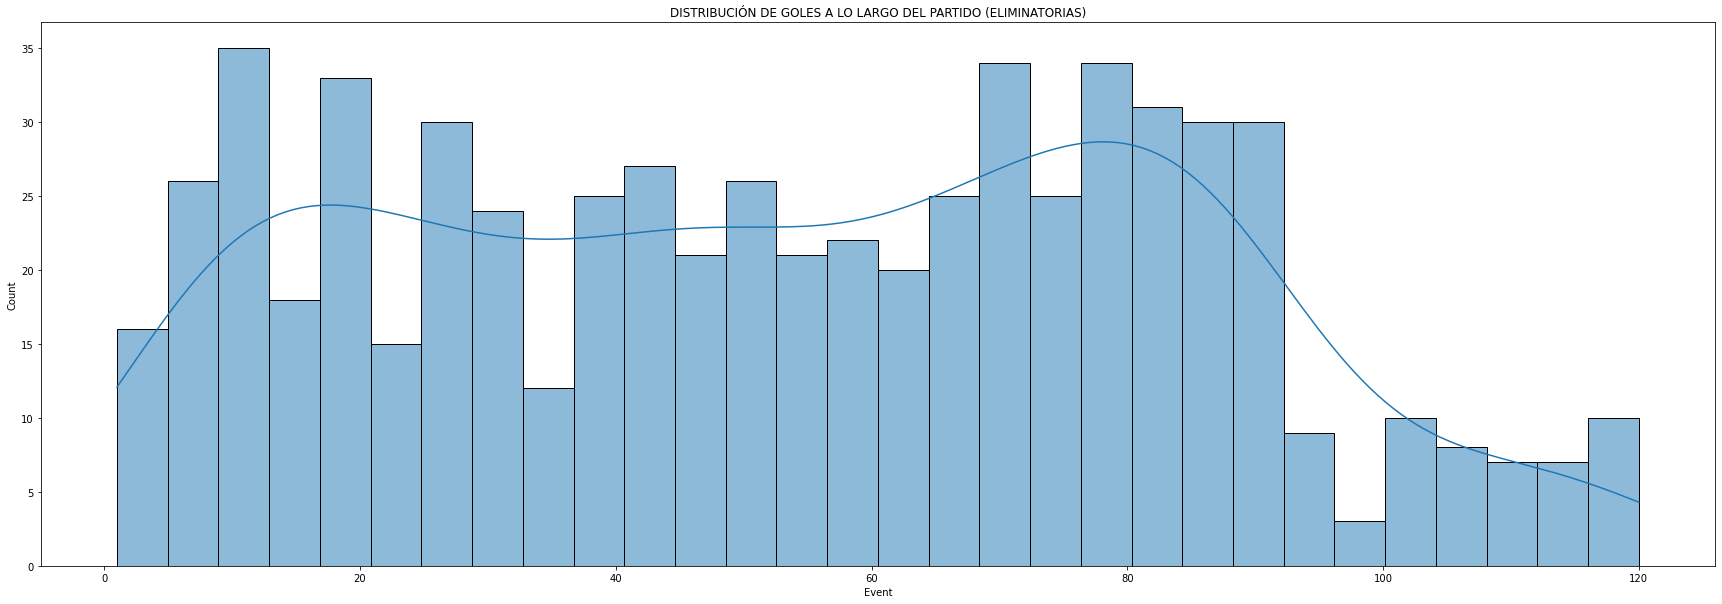

In [43]:
# REPITO EL PROCESO ANTERIOR CON LA FASE DE ELIMINATORIAS:
eliminatorias = eliminatorias.drop_duplicates(subset=['MatchID','RoundID','Player Name'], keep='first') #Droppeo aquellos registros donde el MatchID, la ronda y el Player Name sean iguales (elimino duplicados)
eliminatorias['Event'] = eliminatorias['Event'].astype('string') #Convierto esta columna a string (object para pandas)
eliminatorias = eliminatorias[eliminatorias['Event'].str.contains('G')] #Me quedo solo con aquelos jugadores que hayan metido algún gol.


#Ahora, debo quedarme solo con los goles. Para ello, tomo cada evento como si fueran "palabras" y elimino todas aquellas que no empiezan con G (es decir, todos los eventos que no son goles).
#https://stackoverflow.com/questions/66569634/removing-words-starting-with-http-in-a-pandas-dataframe
#Hago una línea de comando por cada evento.
"""El código completo para "Events" es:

G = Goal
Y = Yellow card
RSY = Red card by second yellow card
R = Red card
O = Substitution out
I = Substitution in
OH = Substitution out in the half-time
IH = Substitution in in the half-time
W = Own goal
P = Penalty scored
MP = Missed Penalty
U = Unknown event"""

#Los goles de penal los contaremos también y haremos un histograma de los goles marcados en los 90 minutos + 30 tiempo extra = 120 minutos totales.
eliminatorias['Event'] = eliminatorias['Event'].str.replace('I[^\s]*',"")
eliminatorias['Event'] = eliminatorias['Event'].str.replace('Y[^\s]*',"")
eliminatorias['Event'] = eliminatorias['Event'].str.replace('RSY[^\s]*',"")
eliminatorias['Event'] = eliminatorias['Event'].str.replace('R[^\s]*',"")
eliminatorias['Event'] = eliminatorias['Event'].str.replace('O[^\s]*',"")
eliminatorias['Event'] = eliminatorias['Event'].str.replace('OH[^\s]*',"")
eliminatorias['Event'] = eliminatorias['Event'].str.replace('IH[^\s]*',"")
eliminatorias['Event'] = eliminatorias['Event'].str.replace('W[^\s]*',"")
eliminatorias['Event'] = eliminatorias['Event'].str.replace('MP[^\s]*',"")
eliminatorias['Event'] = eliminatorias['Event'].str.replace('U[^\s]*',"")



#Ahora, me conviene cambiar todas las P por G, para así uniformizar y contar a los penales en la misma categoría que los goles.
eliminatorias["Event"] = eliminatorias["Event"].str.replace("P", "G")


#Me conviene crear una nueva fila para los jugadores que hicieron más de un gol, de forma tal que por ejemplo, un jugador que hizo un gol a los 10, 15 y 20 minutos,
# tenga 3 registros, uno por cada gol. Así se hace más fácil contar luego las ocurrencias de cada gol a cada minuto.
# Esto lo hago con el método Explode aplicado a la columna Event (https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows)
eliminatorias = eliminatorias.assign(Event=eliminatorias['Event'].str.split(' ')).explode("Event")
# Aquí vemos que hay varios cuyo minuto de conversión está sin marcar, y mirando en detalle el dataframe vemos que son de hecho duplicados de otros goles.
# El problema viene de que estos duplicados están muy mezclados y no podemos decir nada claro respecto a con cual queremos quedarnos (el primer o segundo registro)
# por lo cual la técnica que veníamos usando, 
# df = df.drop_duplicates(subset=['MatchID', 'Player Name', 'Team Initials'], keep='first') #Droppeamos los goles repetidos
# no nos sirve. Lo que haremos será eliminar estos registros que contienen a los goles sin marcar, ya que de todas formas sabemos que son duplicados, y trabajamos con los demás.
eliminatorias = eliminatorias['Event'].replace('', np.nan, inplace=False) #Todos las celdas vacías las convierto a np.nan para que pandas las reconozca y las droppee
eliminatorias = eliminatorias.dropna(inplace=False)
eliminatorias = pd.DataFrame(eliminatorias)


# Cuento entonces, las ocurrencias de cada G de 0 a 120 para ir viendo la tendencia dentro de la columna Event y convierto el value counts a dataframe
# (porque ya sé que todos los eventos que tengo son goles o penales marcados)
# Ahora lo que hacemos es guardar ese value counts en un nuevo dataframe auxiliar, goles:
goles_eliminatorias = pd.DataFrame(eliminatorias['Event'].value_counts().reset_index().values, columns=['Minute','Goals'])


eliminatorias = eliminatorias.reset_index()
eliminatorias['Event'] = eliminatorias['Event'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int) #Aquí lo que hago es sacar todo lo que no sea un número y lo que queda lo hago int para que el histograma pueda ordenar.
#https://www.pauldesalvo.com/how-to-extract-all-numbers-from-a-string-column-in-python-pandas/
eliminatorias = eliminatorias.sort_values(by=['Event']) #Ordeno los eventos de forma ascendente para que el histograma quede bien


fig, ax = plt.subplots(figsize=(30, 10))
sbn.histplot(data=eliminatorias, x="Event", bins=30, kde=True, ax=ax).set_title('DISTRIBUCIÓN DE GOLES A LO LARGO DEL PARTIDO (ELIMINATORIAS)') #Hago un histograma con 30 bines de 4 minutos de ancho (desde 0 a 120) que muestre la distribución

# 7.
Para los partidos en los que hubo al menos algún gol, obtener el tiempo que transcurrió hasta el primer gol. h Hacer un histograma de la distribución de estos valores.

In [44]:
#Para esto, lo que haré es mergear desde el MatchID un nuevo dataframe que contenga los datos de los partidos y los jugadores

partidos = 'WorldCupMatches.csv' # Definimos la ubicación + nombre de archivo en cuestión
matches = pd.read_csv(partidos) # Levantamos el archivo a través de pandas. Ahora, matches es un Data Frame
matches.dropna(axis=1, how='all',inplace=True) # Elimino filas con todos los valores nan
matches.drop_duplicates(inplace=True)
matches.head


jugadores = 'WorldCupPlayers.csv' # Definimos la ubicación + nombre de archivo en cuestión
players = pd.read_csv(jugadores) # Levantamos el archivo a través de pandas. Ahora, players es un Data Frame
players.dropna(axis=1, how='all',inplace=True) # Elimino filas con todos los valores nan
players.drop_duplicates(inplace=True)
players.head


total = pd.merge(players, matches, how='inner', suffixes=('', '_drop')) # Mergeo los dataframes marcando con _drop las duplicadas
total.drop([col for col in total.columns if 'drop' in col], axis=1, inplace=True) # Droppeo columnas marcadas como duplicadas
total

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN,1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN,1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN,1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37043,255951,300186497,USA,KLINSMANN Juergen (GER),N,17,ALTIDORE,NaN,NaN,2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA
37044,255951,300186497,BEL,WILMOTS Marc (BEL),N,16,DEFOUR,NaN,NaN,2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA
37045,255951,300186497,USA,KLINSMANN Juergen (GER),N,18,WONDOLOWSKI,NaN,I72',2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA
37046,255951,300186497,BEL,WILMOTS Marc (BEL),N,21,VANDEN BORRE,NaN,NaN,2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA


In [45]:
# Tomo los registros que traten sobre partidos en los que hubo al menos un gol.
total['Total Goals'] = total['Home Team Goals'] + total['Away Team Goals'] # La nueva columna Total Goals será la cantidad de goles totales por partido.
total = total[total["Total Goals"]>0]
total

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Total Goals
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN,1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN,1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN,1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37043,255951,300186497,USA,KLINSMANN Juergen (GER),N,17,ALTIDORE,NaN,NaN,2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37044,255951,300186497,BEL,WILMOTS Marc (BEL),N,16,DEFOUR,NaN,NaN,2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37045,255951,300186497,USA,KLINSMANN Juergen (GER),N,18,WONDOLOWSKI,NaN,I72',2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37046,255951,300186497,BEL,WILMOTS Marc (BEL),N,21,VANDEN BORRE,NaN,NaN,2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0


In [46]:
# Ahora, me va a convenir quedarme solo con aquellos jugadores cuyo evento haya sido Gol o Penal para luego ver a qué tiempo fue esto. Repetimos el proceso anterior:

total = total.drop_duplicates(subset=['MatchID','RoundID','Player Name'], keep='first') #Droppeo aquellos registros donde el MatchID, la ronda y el Player Name sean iguales (elimino duplicados)
total['Event'] = total['Event'].astype('string') #Convierto esta columna a string (object para pandas)
total = total[total['Event'].str.contains('G')] #Me quedo solo con aquelos jugadores que hayan metido algún gol.


#Ahora, debo quedarme solo con los goles. Para ello, tomo cada evento como si fueran "palabras" y elimino todas aquellas que no empiezan con G (es decir, todos los eventos que no son goles).
#https://stackoverflow.com/questions/66569634/removing-words-starting-with-http-in-a-pandas-dataframe
#Hago una línea de comando por cada evento.
"""El código completo para "Events" es:

G = Goal
Y = Yellow card
RSY = Red card by second yellow card
R = Red card
O = Substitution out
I = Substitution in
OH = Substitution out in the half-time
IH = Substitution in in the half-time
W = Own goal
P = Penalty scored
MP = Missed Penalty
U = Unknown event"""

#Los goles de penal los contaremos también y haremos un histograma de los goles marcados en los 90 minutos + 30 tiempo extra = 120 minutos totales.
total['Event'] = total['Event'].str.replace('I[^\s]*',"")
total['Event'] = total['Event'].str.replace('Y[^\s]*',"")
total['Event'] = total['Event'].str.replace('RSY[^\s]*',"")
total['Event'] = total['Event'].str.replace('R[^\s]*',"")
total['Event'] = total['Event'].str.replace('O[^\s]*',"")
total['Event'] = total['Event'].str.replace('OH[^\s]*',"")
total['Event'] = total['Event'].str.replace('IH[^\s]*',"")
total['Event'] = total['Event'].str.replace('W[^\s]*',"")
total['Event'] = total['Event'].str.replace('MP[^\s]*',"")
total['Event'] = total['Event'].str.replace('U[^\s]*',"")



#Ahora, me conviene cambiar todas las P por G, para así uniformizar y contar a los penales en la misma categoría que los goles.
total["Event"] = total["Event"].str.replace("P", "G")
total

C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\376496340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['Event'] = total['Event'].astype('string') #Convierto esta columna a string (object para pandas)
C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\376496340.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  total['Event'] = total['Event'].str.replace('I[^\s]*',"")
C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\376496340.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Total Goals
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45',1930.0,...,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),USA,BEL,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36927,255951,300186459,GRE,SANTOS Fernando (POR),S,19,SOKRATIS,NaN,G90',2014.0,...,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),CRC,GRE,2.0
36964,255951,300186503,ARG,SABELLA Alejandro (ARG),S,7,DI MARIA,NaN,G118',2014.0,...,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),ARG,SUI,1.0
37012,255951,300186497,BEL,WILMOTS Marc (BEL),S,7,DE BRUYNE,NaN,G93',2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37030,255951,300186497,BEL,WILMOTS Marc (BEL),N,9,LUKAKU,NaN,G105',2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0


In [47]:
#Me conviene crear una nueva fila para los jugadores que hicieron más de un gol, de forma tal que por ejemplo, un jugador que hizo un gol a los 10, 15 y 20 minutos,
# tenga 3 registros, uno por cada gol. Así se hace más fácil contar luego las ocurrencias de cada gol a cada minuto.
# Esto lo hago con el método Explode aplicado a la columna Event (https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows)
total = total.assign(Event=total['Event'].str.split(' ')).explode("Event")
total

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Total Goals
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G87',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37012,255951,300186497,BEL,WILMOTS Marc (BEL),S,7,DE BRUYNE,NaN,G93',2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37030,255951,300186497,BEL,WILMOTS Marc (BEL),N,9,LUKAKU,NaN,,2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37030,255951,300186497,BEL,WILMOTS Marc (BEL),N,9,LUKAKU,NaN,G105',2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37041,255951,300186497,USA,KLINSMANN Juergen (GER),N,16,GREEN,NaN,,2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0


In [48]:
# Aquí vemos que hay varios cuyo minuto de conversión está sin marcar, y mirando en detalle el dataframe vemos que son de hecho duplicados de otros goles.
# El problema viene de que estos duplicados están muy mezclados y no podemos decir nada claro respecto a con cual queremos quedarnos (el primer o segundo registro)
# por lo cual la técnica que veníamos usando, 
# df = df.drop_duplicates(subset=['MatchID', 'Player Name', 'Team Initials'], keep='first') #Droppeamos los goles repetidos
# no nos sirve. Lo que haremos será eliminar estos registros que contienen a los goles sin marcar, ya que de todas formas sabemos que son duplicados, y trabajamos con los demás.
total['Event'].replace('', np.nan, inplace=True) #Todas las celdas vacías en Events las convierto a np.nan para que pandas las reconozca y las droppee
total.dropna(subset=['Event'],inplace=True) #Elimino registros con Event np.nan
total

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Total Goals
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G87',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36927,255951,300186459,GRE,SANTOS Fernando (POR),S,19,SOKRATIS,NaN,G90',2014.0,...,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),CRC,GRE,2.0
36964,255951,300186503,ARG,SABELLA Alejandro (ARG),S,7,DI MARIA,NaN,G118',2014.0,...,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),ARG,SUI,1.0
37012,255951,300186497,BEL,WILMOTS Marc (BEL),S,7,DE BRUYNE,NaN,G93',2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37030,255951,300186497,BEL,WILMOTS Marc (BEL),N,9,LUKAKU,NaN,G105',2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0


In [49]:
total = total.reset_index()
total['Event'] = total['Event'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int) 
#Aquí lo que hago es sacar todo lo que no sea un número y lo que queda lo hago int para que el histograma pueda ordenar luego.
#https://www.pauldesalvo.com/how-to-extract-all-numbers-from-a-string-column-in-python-pandas/
total = total.sort_values(by=['Event']) #Ordeno los eventos de forma ascendente para que el histograma quede bien
total

,index,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,...,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Total Goals
693,8356,239,1702,PRK,MYUNG Rye Hyun (PRK),S,8,PAK Seung Zin,C,1,...,,40248.0,2.0,3.0,ASHKENAZI Menachem (ISR),GALBA Karol (TCH),SCHWINTE Pierre (FRA),POR,PRK,8.0
1560,24181,1014,8763,PAR,CARPEGIANI (BRA),S,5,AYALA,NaN,1,...,,33500.0,1.0,1.0,ANPRASERT Pirom (THA),AL MUSAWI Mohamed (OMA),NILSSON Mikael (SWE),NGA,PAR,4.0
2073,34711,255931,300186512,USA,KLINSMANN Juergen (GER),S,8,DEMPSEY,C,1,...,,39760.0,0.0,1.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),GHA,USA,3.0
201,1992,3489,1176,SWE,NAGY Joszef (HUN),S,0,Arne NYBERG,NaN,1,...,,20000.0,3.0,1.0,LECLERCQ Lucien (FRA),VAN MOORSEL Johannes (NED),SCARPI Giuseppe (ITA),HUN,SWE,6.0
11,112,201,1098,ROU,LUCHIDE Octav (ROU),S,0,Adalbert DESU,NaN,1,...,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),ROU,PER,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,30980,97410400,97410061,ITA,LIPPI Marcello (ITA),S,3,GROSSO,NaN,119,...,Italy win after extra time,65000.0,0.0,0.0,ARCHUNDIA Benito (MEX),RAMIREZ Jose (MEX),VERGARA Hector (CAN),GER,ITA,2.0
2169,36493,255951,300186460,ALG,HALILHODZIC Vahid (BIH),N,18,DJABOU,NaN,120,...,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),GER,ALG,3.0
711,8537,3478,1633,ENG,RAMSEY Alf (ENG),S,10,Geoff HURST,NaN,120,...,England win after extra time,96924.0,0.0,0.0,DIENST Gottfried (SUI),BAKHRAMOV Tofik (URS),GALBA Karol (TCH),ENG,FRG,6.0
2167,36456,255951,300186460,GER,LOEW Joachim (GER),S,8,�ZIL,NaN,120,...,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),GER,ALG,3.0


In [50]:
total = total[total.groupby('MatchID')['Event'].transform(min) == total['Event']] #Con este código, obtengo el mínimo valor para Event según el MatchID (es decir, el primer gol de cada partido)
#https://stackoverflow.com/questions/47851540/select-and-minimum-value-of-a-data-frame-column-by-category

In [51]:
# Hecho lo anterior, ahora solo queda contar cuantas veces se metió un gol a cada minuto, para así tener una idea de cuanto tiempo pasa hasta el primer gol
# Ahora lo que hacemos es guardar ese value counts en un nuevo dataframe auxiliar:
primer_gol = pd.DataFrame(total['Event'].value_counts().reset_index().values, columns=['Minute','Goals'])
primer_gol

,Minute,Goals
0,11,24
1,18,22
2,4,21
3,12,21
4,15,20
...,...,...
92,113,1
93,114,1
94,116,1
95,117,1


In [52]:
total

,index,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,...,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Total Goals
693,8356,239,1702,PRK,MYUNG Rye Hyun (PRK),S,8,PAK Seung Zin,C,1,...,,40248.0,2.0,3.0,ASHKENAZI Menachem (ISR),GALBA Karol (TCH),SCHWINTE Pierre (FRA),POR,PRK,8.0
1560,24181,1014,8763,PAR,CARPEGIANI (BRA),S,5,AYALA,NaN,1,...,,33500.0,1.0,1.0,ANPRASERT Pirom (THA),AL MUSAWI Mohamed (OMA),NILSSON Mikael (SWE),NGA,PAR,4.0
2073,34711,255931,300186512,USA,KLINSMANN Juergen (GER),S,8,DEMPSEY,C,1,...,,39760.0,0.0,1.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),GHA,USA,3.0
201,1992,3489,1176,SWE,NAGY Joszef (HUN),S,0,Arne NYBERG,NaN,1,...,,20000.0,3.0,1.0,LECLERCQ Lucien (FRA),VAN MOORSEL Johannes (NED),SCARPI Giuseppe (ITA),HUN,SWE,6.0
11,112,201,1098,ROU,LUCHIDE Octav (ROU),S,0,Adalbert DESU,NaN,1,...,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),ROU,PER,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,34065,249721,300061509,ESP,DEL BOSQUE Vicente (ESP),S,6,A.INIESTA,NaN,116,...,Spain win after extra time,84490.0,0.0,0.0,WEBB Howard (ENG),Darren CANN (ENG),MULLARKEY Michael (ENG),NED,ESP,1.0
785,9768,251,1925,URU,HOHBERG Juan (URU),N,9,Victor ESPARRAGO,NaN,117,...,Uruguay win after extra time,26085.0,0.0,0.0,VAN RAVENS Laurens (NED),DAVIDSON Bob (SCO),GLOECKNER Rudolf (GDR),URU,URS,1.0
2189,36964,255951,300186503,ARG,SABELLA Alejandro (ARG),S,7,DI MARIA,NaN,118,...,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),ARG,SUI,1.0
1333,19805,323,55,ENG,ROBSON Bobby (ENG),N,17,David PLATT,NaN,119,...,England win after extra time,34520.0,0.0,0.0,MIKKELSEN Peter (DEN),KOHL Helmut (AUT),TAKADA Shizuo (JPN),ENG,BEL,1.0


Text(0.5, 1.0, 'TIEMPO HASTA PRIMER GOL POR PARTIDO')

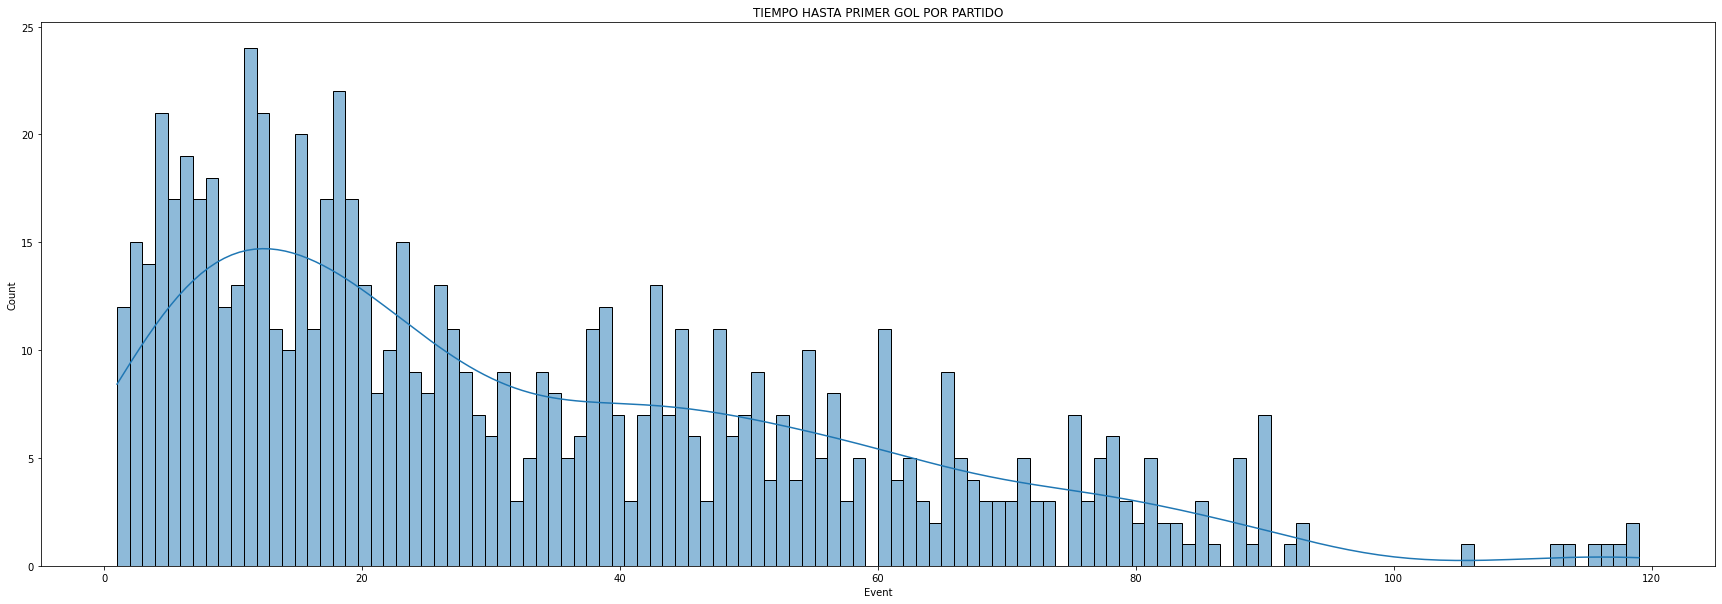

In [53]:
fig, ax = plt.subplots(figsize=(30, 10))
sbn.histplot(data=total, x="Event", bins=120, kde=True, ax=ax).set_title('TIEMPO HASTA PRIMER GOL POR PARTIDO') #Hago un histograma que muestre la distribución

# 8.
Para los partidos en los que hubo más de un gol, obtener los tiempos transcurridos entre goles. Hacer un histograma de la distribución de estos valores.

In [54]:
#Para esto, lo que haré es mergear desde el MatchID un nuevo dataframe que contenga los datos de los partidos y los jugadores

partidos = 'WorldCupMatches.csv' # Definimos la ubicación + nombre de archivo en cuestión
matches = pd.read_csv(partidos) # Levantamos el archivo a través de pandas. Ahora, matches es un Data Frame
matches.dropna(axis=1, how='all',inplace=True) # Elimino filas con todos los valores nan
matches.drop_duplicates(inplace=True)
matches.head


jugadores = 'WorldCupPlayers.csv' # Definimos la ubicación + nombre de archivo en cuestión
players = pd.read_csv(jugadores) # Levantamos el archivo a través de pandas. Ahora, players es un Data Frame
players.dropna(axis=1, how='all',inplace=True) # Elimino filas con todos los valores nan
players.drop_duplicates(inplace=True)
players.head


total = pd.merge(players, matches, how='inner', suffixes=('', '_drop')) # Mergeo los dataframes marcando con _drop las duplicadas
total.drop([col for col in total.columns if 'drop' in col], axis=1, inplace=True) # Droppeo columnas marcadas como duplicadas
total

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN,1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN,1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN,1930.0,...,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37043,255951,300186497,USA,KLINSMANN Juergen (GER),N,17,ALTIDORE,NaN,NaN,2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA
37044,255951,300186497,BEL,WILMOTS Marc (BEL),N,16,DEFOUR,NaN,NaN,2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA
37045,255951,300186497,USA,KLINSMANN Juergen (GER),N,18,WONDOLOWSKI,NaN,I72',2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA
37046,255951,300186497,BEL,WILMOTS Marc (BEL),N,21,VANDEN BORRE,NaN,NaN,2014.0,...,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA


In [55]:
# Para esta consigna, como quiero calcular cuanto tiempo hubo entre goles en promedio, tomo los registros que traten sobre partidos en los que hubo más de un gol.
total['Total Goals'] = total['Home Team Goals'] + total['Away Team Goals'] # La nueva columna Total Goals será la cantidad de goles totales por partido.
total = total[total["Total Goals"]>1] #Tomo aquellos registros que traten sobre partidos con más de un gol.
total

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Total Goals
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN,1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN,1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN,1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37043,255951,300186497,USA,KLINSMANN Juergen (GER),N,17,ALTIDORE,NaN,NaN,2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37044,255951,300186497,BEL,WILMOTS Marc (BEL),N,16,DEFOUR,NaN,NaN,2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37045,255951,300186497,USA,KLINSMANN Juergen (GER),N,18,WONDOLOWSKI,NaN,I72',2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37046,255951,300186497,BEL,WILMOTS Marc (BEL),N,21,VANDEN BORRE,NaN,NaN,2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0


In [56]:
# Ahora, me va a convenir quedarme solo con aquellos jugadores cuyo evento haya sido Gol o Penal para luego ver a qué tiempo fue esto. Repetimos el proceso anterior:

total = total.drop_duplicates(subset=['MatchID','RoundID','Player Name'], keep='first') #Droppeo aquellos registros donde el MatchID, la ronda y el Player Name sean iguales (elimino duplicados)
total['Event'] = total['Event'].astype('string') #Convierto esta columna a string (object para pandas)
total = total[total['Event'].str.contains('G')] #Me quedo solo con aquelos jugadores que hayan metido algún gol.


#Ahora, debo quedarme solo con los goles. Para ello, tomo cada evento como si fueran "palabras" y elimino todas aquellas que no empiezan con G (es decir, todos los eventos que no son goles).
#https://stackoverflow.com/questions/66569634/removing-words-starting-with-http-in-a-pandas-dataframe
#Hago una línea de comando por cada evento.
"""El código completo para "Events" es:

G = Goal
Y = Yellow card
RSY = Red card by second yellow card
R = Red card
O = Substitution out
I = Substitution in
OH = Substitution out in the half-time
IH = Substitution in in the half-time
W = Own goal
P = Penalty scored
MP = Missed Penalty
U = Unknown event"""

#Los goles de penal los contaremos también y haremos un histograma de los goles marcados en los 90 minutos + 30 tiempo extra = 120 minutos totales.
total['Event'] = total['Event'].str.replace('I[^\s]*',"")
total['Event'] = total['Event'].str.replace('Y[^\s]*',"")
total['Event'] = total['Event'].str.replace('RSY[^\s]*',"")
total['Event'] = total['Event'].str.replace('R[^\s]*',"")
total['Event'] = total['Event'].str.replace('O[^\s]*',"")
total['Event'] = total['Event'].str.replace('OH[^\s]*',"")
total['Event'] = total['Event'].str.replace('IH[^\s]*',"")
total['Event'] = total['Event'].str.replace('W[^\s]*',"")
total['Event'] = total['Event'].str.replace('MP[^\s]*',"")
total['Event'] = total['Event'].str.replace('U[^\s]*',"")



#Ahora, me conviene cambiar todas las P por G, para así uniformizar y contar a los penales en la misma categoría que los goles.
total["Event"] = total["Event"].str.replace("P", "G")
total

C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\376496340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['Event'] = total['Event'].astype('string') #Convierto esta columna a string (object para pandas)
C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\376496340.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  total['Event'] = total['Event'].str.replace('I[^\s]*',"")
C:\Users\mdds2\AppData\Local\Temp\ipykernel_21244\376496340.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Total Goals
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45',1930.0,...,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),USA,BEL,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36924,255951,300186459,CRC,PINTO Jorge Luis (COL),S,10,RUIZ B.,C,G52',2014.0,...,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),CRC,GRE,2.0
36927,255951,300186459,GRE,SANTOS Fernando (POR),S,19,SOKRATIS,NaN,G90',2014.0,...,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),CRC,GRE,2.0
37012,255951,300186497,BEL,WILMOTS Marc (BEL),S,7,DE BRUYNE,NaN,G93',2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37030,255951,300186497,BEL,WILMOTS Marc (BEL),N,9,LUKAKU,NaN,G105',2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0


In [57]:
#Me conviene crear una nueva fila para los jugadores que hicieron más de un gol, de forma tal que por ejemplo, un jugador que hizo un gol a los 10, 15 y 20 minutos,
# tenga 3 registros, uno por cada gol. Así se hace más fácil contar luego las ocurrencias de cada gol a cada minuto.
# Esto lo hago con el método Explode aplicado a la columna Event (https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows)
total = total.assign(Event=total['Event'].str.split(' ')).explode("Event")
total

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Total Goals
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G87',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37012,255951,300186497,BEL,WILMOTS Marc (BEL),S,7,DE BRUYNE,NaN,G93',2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37030,255951,300186497,BEL,WILMOTS Marc (BEL),N,9,LUKAKU,NaN,,2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37030,255951,300186497,BEL,WILMOTS Marc (BEL),N,9,LUKAKU,NaN,G105',2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37041,255951,300186497,USA,KLINSMANN Juergen (GER),N,16,GREEN,NaN,,2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0


In [58]:
# Lo que planeo hacer, es, según el MatchID, crear una nueva columna que sea la diferencia en minutos entre goles.
# Sin embargo vemos que hay varios cuyo minuto de conversión está sin marcar, y mirando en detalle el dataframe vemos que son de hecho duplicados de otros goles.
# El problema viene de que estos duplicados están muy mezclados y no podemos decir nada claro respecto a con cual queremos quedarnos (el primer o segundo registro)
# por lo cual la técnica que veníamos usando, 
# df = df.drop_duplicates(subset=['MatchID', 'Player Name', 'Team Initials'], keep='first') #Droppeamos los goles repetidos
# no nos sirve. Lo que haremos será eliminar estos registros que contienen a los goles sin marcar, ya que de todas formas sabemos que son duplicados, y trabajamos con los demás.
total['Event'].replace('', np.nan, inplace=True) #Todas las celdas vacías en Events las convierto a np.nan para que pandas las reconozca y las droppee
total = total.dropna(subset=['Event'],inplace=False) #Elimino registros con Event np.nan
total

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Total Goals
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G87',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19',1930.0,...,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36924,255951,300186459,CRC,PINTO Jorge Luis (COL),S,10,RUIZ B.,C,G52',2014.0,...,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),CRC,GRE,2.0
36927,255951,300186459,GRE,SANTOS Fernando (POR),S,19,SOKRATIS,NaN,G90',2014.0,...,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),CRC,GRE,2.0
37012,255951,300186497,BEL,WILMOTS Marc (BEL),S,7,DE BRUYNE,NaN,G93',2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0
37030,255951,300186497,BEL,WILMOTS Marc (BEL),N,9,LUKAKU,NaN,G105',2014.0,...,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),BEL,USA,3.0


In [59]:
total = total.reset_index()
total['Event'] = total['Event'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int) 
#Aquí lo que hago es sacar todo lo que no sea un número y lo que queda lo hago int para que el histograma pueda ordenar luego.
#https://www.pauldesalvo.com/how-to-extract-all-numbers-from-a-string-column-in-python-pandas/
total = total.sort_values(by=['Event']) #Ordeno los eventos de forma ascendente para que el histograma quede bien
total

,index,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,...,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Total Goals
142,1483,206,1146,FRA,BARREAU Gaston (FRA),S,0,Emile VEINANTE,NaN,1,...,,30454.0,2.0,1.0,WUETHRICH Hans (SUI),KRIST Gustav (TCH),BIRLEM Alfred (GER),FRA,BEL,4.0
1942,34711,255931,300186512,USA,KLINSMANN Juergen (GER),S,8,DEMPSEY,C,1,...,,39760.0,0.0,1.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),GHA,USA,3.0
195,1992,3489,1176,SWE,NAGY Joszef (HUN),S,0,Arne NYBERG,NaN,1,...,,20000.0,3.0,1.0,LECLERCQ Lucien (FRA),VAN MOORSEL Johannes (NED),SCARPI Giuseppe (ITA),HUN,SWE,6.0
967,13627,293,878,ENG,GREENWOOD Ron (ENG),S,16,Bryan ROBSON,NaN,1,...,,44172.0,1.0,1.0,GARRIDO Antonio (POR),CASTRO Gaston (CHI),COELHO Arnaldo (BRA),ENG,FRA,4.0
856,11699,278,2347,FRA,HIDALGO Michel (FRA),S,17,Bernard LACOMBE,NaN,1,...,,42373.0,1.0,1.0,RAINEA Nicolae (ROU),LINEMAYR Erich (AUT),SILVAGNO CAVANNA Juan (CHI),ITA,FRA,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,30980,97410400,97410061,ITA,LIPPI Marcello (ITA),S,3,GROSSO,NaN,119,...,Italy win after extra time,65000.0,0.0,0.0,ARCHUNDIA Benito (MEX),RAMIREZ Jose (MEX),VERGARA Hector (CAN),GER,ITA,2.0
1782,31006,97410400,97410061,ITA,LIPPI Marcello (ITA),N,7,DEL PIERO,NaN,120,...,Italy win after extra time,65000.0,0.0,0.0,ARCHUNDIA Benito (MEX),RAMIREZ Jose (MEX),VERGARA Hector (CAN),GER,ITA,2.0
688,8537,3478,1633,ENG,RAMSEY Alf (ENG),S,10,Geoff HURST,NaN,120,...,England win after extra time,96924.0,0.0,0.0,DIENST Gottfried (SUI),BAKHRAMOV Tofik (URS),GALBA Karol (TCH),ENG,FRG,6.0
2031,36493,255951,300186460,ALG,HALILHODZIC Vahid (BIH),N,18,DJABOU,NaN,120,...,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),GER,ALG,3.0


In [60]:
"""#Ahora, hago la resta entre los tiempos de gol, resto un tiempo con su tiempo siguiente más cercano, y así, para obtener la diferencia de tiempos entre ellos.
total['Difference between goals'] = total['Event'] - total.loc[total.groupby('MatchID')['Event'].transform('idxmin'), 'Event'].values
total"""

"#Ahora, hago la resta entre los tiempos de gol, resto un tiempo con su tiempo siguiente más cercano, y así, para obtener la diferencia de tiempos entre ellos.\ntotal['Difference between goals'] = total['Event'] - total.loc[total.groupby('MatchID')['Event'].transform('idxmin'), 'Event'].values\ntotal"

In [61]:
"""total.loc[total['MatchID'] == 1176] #Me fijo en algún partido con muchos goles, por ejemplo este de MatchID 1176 que tuvo 6, si las restas están bien hechas
# (es decir, si cada diferencia es la resta entre un gol y su gol siguiente más cercano)"""

"total.loc[total['MatchID'] == 1176] #Me fijo en algún partido con muchos goles, por ejemplo este de MatchID 1176 que tuvo 6, si las restas están bien hechas\n# (es decir, si cada diferencia es la resta entre un gol y su gol siguiente más cercano)"

In [62]:
# Parece que no funciona bien. Pruebo otro método haciendo la resta entre un event y su event más cercano:
# https://stackoverflow.com/questions/48998325/subtracting-datetime-value-from-previous-row-in-pandas-dataframe
total = total.sort_values(by=['MatchID']) #pongo juntas las filas pertenecientes al mismo MatchID (hago un sort por MatchID, aunque estoy tratando a MatchID como categoría)
total["Difference between goals"] = np.where(total.MatchID == total.MatchID.shift(), abs(total["Event"] - total["Event"].shift()), np.nan) #Tomo el módulo de las diferencias.
total.loc[total['MatchID'] == 1176] #Me fijo en algún partido con muchos goles, por ejemplo este de MatchID 1176 que tuvo 6, si las restas están bien hechas
# (es decir, si cada diferencia es la resta entre un gol y su gol siguiente más cercano)

,index,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials,Total Goals,Difference between goals
194,1987,3489,1176,HUN,DIETZ Karoly (HUN),S,0,Gyula ZSENGELLER,NaN,85,...,20000.0,3.0,1.0,LECLERCQ Lucien (FRA),VAN MOORSEL Johannes (NED),SCARPI Giuseppe (ITA),HUN,SWE,6.0,NaN
191,1983,3489,1176,HUN,DIETZ Karoly (HUN),S,0,Gyorgy SAROSI,C,65,...,20000.0,3.0,1.0,LECLERCQ Lucien (FRA),VAN MOORSEL Johannes (NED),SCARPI Giuseppe (ITA),HUN,SWE,6.0,20.0
193,1987,3489,1176,HUN,DIETZ Karoly (HUN),S,0,Gyula ZSENGELLER,NaN,39,...,20000.0,3.0,1.0,LECLERCQ Lucien (FRA),VAN MOORSEL Johannes (NED),SCARPI Giuseppe (ITA),HUN,SWE,6.0,26.0
192,1985,3489,1176,HUN,DIETZ Karoly (HUN),S,0,Pal TITKOS,NaN,37,...,20000.0,3.0,1.0,LECLERCQ Lucien (FRA),VAN MOORSEL Johannes (NED),SCARPI Giuseppe (ITA),HUN,SWE,6.0,2.0
195,1992,3489,1176,SWE,NAGY Joszef (HUN),S,0,Arne NYBERG,NaN,1,...,20000.0,3.0,1.0,LECLERCQ Lucien (FRA),VAN MOORSEL Johannes (NED),SCARPI Giuseppe (ITA),HUN,SWE,6.0,36.0


In [66]:
# Bien! Ahora solo queda proceder como antes, haciendo un value counts para ir viendo la tendencia y finalmente graficar el histograma.
# Cuento entonces, las ocurrencias de diferencia de 0 a 120 para ir viendo la tendencia dentro de la columna Difference between goals y convierto el value counts a dataframe
# (porque ya sé que todos los eventos que tengo son goles o penales marcados)
# Ahora lo que hacemos es guardar ese value counts en un nuevo dataframe auxiliar, goles:
diferencia_goles = pd.DataFrame(total['Difference between goals'].value_counts().reset_index().values, columns=['Difference','Occurrences'])
diferencia_goles = diferencia_goles.sort_values(by=['Difference'])
diferencia_goles

,Difference,Occurrences
28,1.0,21.0
16,2.0,25.0
3,3.0,33.0
8,4.0,29.0
5,5.0,31.0
...,...,...
90,89.0,1.0
84,91.0,1.0
86,92.0,1.0
85,93.0,1.0


In [68]:
diferencia_goles.columns

Index(['Difference', 'Occurrences'], dtype='object')

Text(0.5, 1.0, 'DIFERENCIA DE TIEMPO ENTRE GOLES A LO LARGO DE UN PARTIDO')

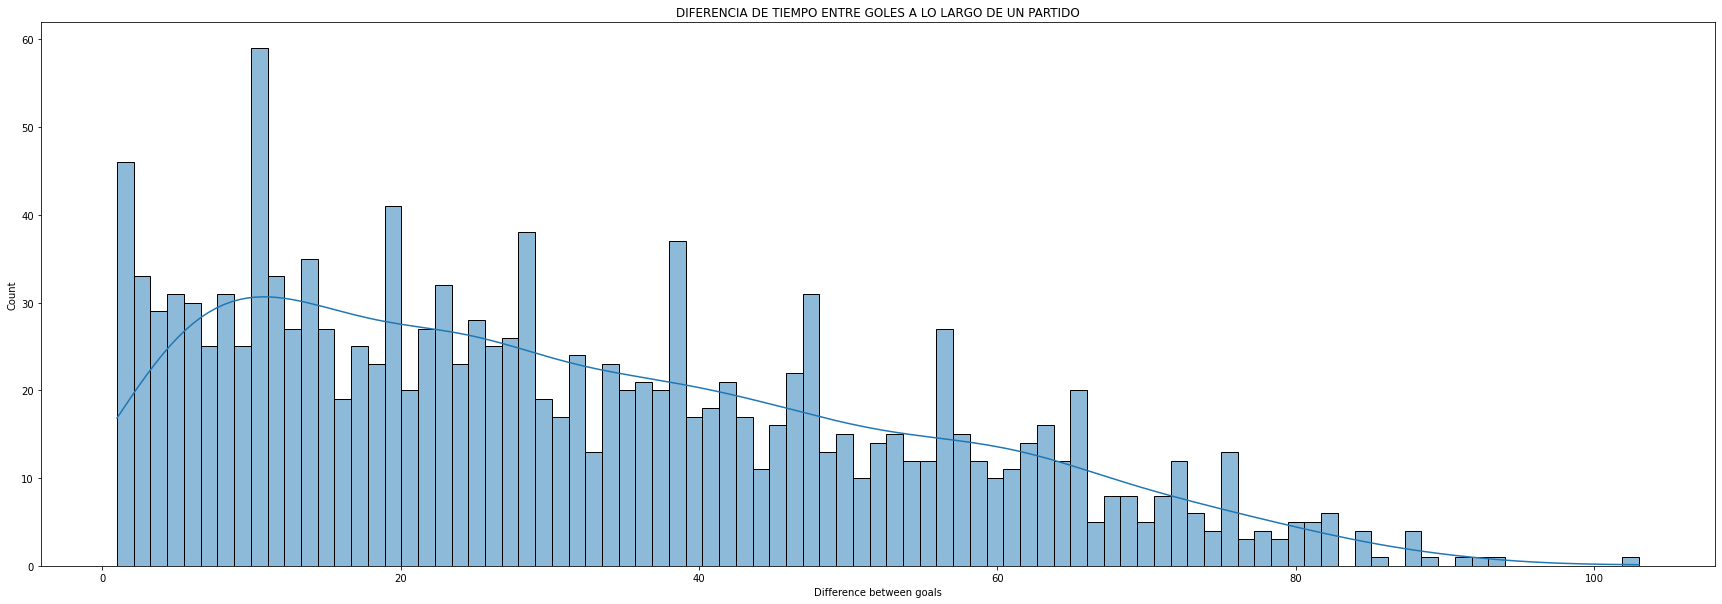

In [77]:
fig, ax = plt.subplots(figsize=(30, 10))
bins = 91

sbn.histplot(data=total, x="Difference between goals", bins=bins, kde=True, ax=ax).set_title('DIFERENCIA DE TIEMPO ENTRE GOLES A LO LARGO DE UN PARTIDO') #Hago un histograma con 120 bines de 1 minuto de ancho (desde 0 a 120) que muestre la distribución

# 9.   
¿Se parecen estas distribuciones a algunas de las que vimos?

El ranking de los mundiales por cantidad de goles anotados en promedio por partido pareciera seguir una distribución exponencial.  

El ranking de los países que más partidos ganaron por penales pareciera seguir también una distribución exponencial, mientras que el de arqueros que más partidos ganaron por penales una distribución entre exponencial y uniforme (más bien exponencial).    

Los histogramas que muestran cómo están distribuidos los goles a lo largo de la duración de un partido muestran unas distribuciones poco claras, me atrevería a decir que es una distribución parecida a una normal pero multimodal, tanto en fase de grupos como en eliminatorias como teniendo en cuenta todos los partidos.    

Para los partidos en los que hubo al menos algún gol, obteniendo el tiempo que transcurrió hasta el primer gol, el histograma de estos valores muestra una distribución asimétrica positiva, muy parecida a una distribución de Poisson (pero para ser más precisos, más parecida a una distribución Chi-squared).  

Para los partidos en los que hubo más de un gol, obteniendo los tiempos transcurridos entre goles, el histograma de estos valores muestra también una distribución asimétrica positiva, muy parecida a una distribución de Poisson
(pero para ser más precisos, más parecida a una distribución Chi-squared).  
